### Student Information
Name:鄧媛如

Student ID: 109078510

GitHub ID: YuanRuDeng

Kaggle name: RURU

Kaggle private scoreboard snapshot:

![Snapshot](./kaggle.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

# Part 1

### Data preparation

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

#count the numbers of words
count_vect = CountVectorizer(max_features=30, stop_words = 'english')
train_counts = count_vect.fit_transform(train_df['text'])

# sort the numbers
train_30 = pd.DataFrame(columns = count_vect.get_feature_names(),
             data = train_counts.toarray()).sum().sort_values(ascending=False)

C:\Users\owuser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


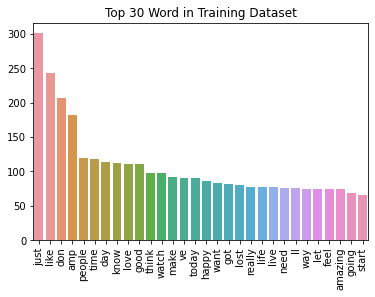

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# use seabon to plot Top 30 Word in Training Dataset
sea_plot = sns.barplot(x=train_30.index, y=train_30)
sea_plot.set_xticklabels(train_30.index, rotation = 90);
plt.title("Top 30 Word in Training Dataset")
plt.show()

In [14]:
#count the numbers of words
count_vect = CountVectorizer(max_features=30, stop_words = 'english')
test_counts = count_vect.fit_transform(test_df['text'])

# sort the numbers
test_30 = pd.DataFrame(columns = count_vect.get_feature_names(),
             data = test_counts.toarray()).sum().sort_values(ascending=False)

C:\Users\owuser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


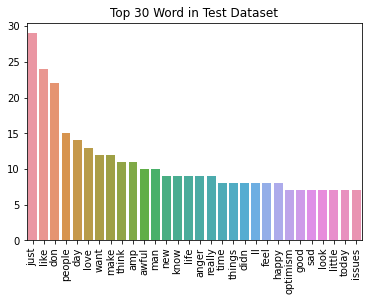

In [16]:
# use seabon to plot Top 30 Word in Test Dataset
sea_plot = sns.barplot(x=test_30.index, y=test_30)
sea_plot.set_xticklabels(test_30.index, rotation = 90);
plt.title("Top 30 Word in Test Dataset")
plt.show()

### Feature engineering

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [18]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [19]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [21]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

C:\Users\owuser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

In [22]:
"😂" in feature_names

False

In [23]:
# try another tokenizer 
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\owuser\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [24]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheering',
 'cheery',
 'class',
 'come',
 'comes',
 'could',
 'country']

In [26]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (TF-IDF)
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

## check dimension
train_data_TFIDF_features_1000.shape

(3613, 1000)

In [31]:
# observe some feature names
feature_names_1000 = TFIDF_1000.get_feature_names()
feature_names_1000[100:110]

['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

In [32]:
"😂" in feature_names_1000

True

### Model

In [63]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [64]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'sadness', 'anger', 'anger', 'joy', 'joy', 'fear',
       'anger', 'fear', 'anger'], dtype=object)

### Results evaluation

In [65]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.99
testing accuracy: 0.66
              precision    recall  f1-score   support

       anger       0.67      0.70      0.69        84
        fear       0.67      0.65      0.66       110
         joy       0.65      0.65      0.65        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [66]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[59 12 10  3]
 [15 72 10 13]
 [ 6 13 51  9]
 [ 8 10  8 48]]


In [67]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

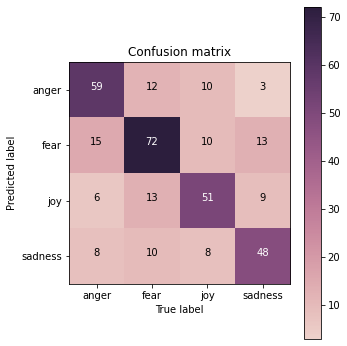

In [68]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

ANS:

From the picture of confusion matrix, we can know that the precision of total is (59+72+51+48)/total = 230/347 = 0.663

Take 'fear' as an example
- the precision is (72)/ (15+72+10+13) = 0.656
- the recall is (72)/ (12+72+13+10) = 0.673 
Both of the two ones are not performance well on the 'fear' feature.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [69]:
# Cut training & testing data
X_train = TFIDF_1000.transform(train_df['text'])
y_train = train_df['emotion']

X_test = TFIDF_1000.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 1000)
y_train.shape:  (3613,)
X_test.shape:  (347, 1000)
y_test.shape:  (347,)


In [72]:
# for a classificaiton problem, you need to provide both training & testing data
from sklearn.naive_bayes import MultinomialNB

## build Naive Bayes model
NB = MultinomialNB()

## training!
NB = NB.fit(X_train, y_train)

## predict!
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)

## so we get the pred result
y_test_pred[:10]

# accuracy
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

# precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.86
testing accuracy: 0.76
              precision    recall  f1-score   support

       anger       0.85      0.71      0.77        84
        fear       0.66      0.92      0.77       110
         joy       0.86      0.75      0.80        79
     sadness       0.85      0.61      0.71        74

    accuracy                           0.76       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.76      0.76       347



In [73]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[ 60  18   3   3]
 [  5 101   2   2]
 [  3  14  59   3]
 [  3  21   5  45]]


In [74]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

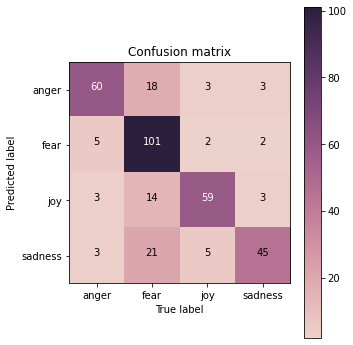

In [75]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

ANS:

From the picture of confusion matrix, we can know that the precision of total is (60+101+59+45)/total = 265/347 = 0.764

Take 'fear' as an example
- the precision is (101)/ (5+101+59+45) = 0.481
- the recall is (101)/ (18+101+14+21) = 0.656 
Both of the two ones are not performance well on the 'fear' feature.

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

From the Naive Bayes model and the Decision Tree model results, we can see that Naive Bayes' F1 score is better than the Decision Tree's F1 score. Although the models all fit well in the training models, but the predicting results look not well. That means it may be caused by the overfitting. Naive Bayes has this problem slightly. However, decision tree is generated from many branches, they usually fit well according to the original data. Therefore, Naive Bayes looks more suitable than the decision tree in this dataset.

### Deep Learning

In [85]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [86]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3578    sadness
204       anger
1481       fear
1751       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [87]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [92]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_4 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_5 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_2 (Softmax)          (None, 4)                 0   

In [94]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 4ms/step - loss: 1.3602 - accuracy: 0.3358 - val_loss: 1.2860 - val_accuracy: 0.4063
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 1.0845 - accuracy: 0.5994 - val_loss: 0.9339 - val_accuracy: 0.6599
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.8049 - val_loss: 0.7786 - val_accuracy: 0.7032
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8639 - val_loss: 0.8220 - val_accuracy: 0.6916
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8902 - val_loss: 0.8357 - val_accuracy: 0.6830
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.9159 - val_loss: 0.9117 - val_accuracy: 0.6628
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9342 - val_loss: 0.9753 - val_accuracy: 0.6744
Epoch 

In [95]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[1.6947586e-02, 7.8153255e-04, 9.8219246e-01, 7.8462988e-05],
       [1.6745100e-04, 9.3119591e-03, 3.2334761e-08, 9.9052060e-01],
       [7.5269649e-03, 1.9137967e-01, 9.2359558e-03, 7.9185742e-01],
       [9.9999940e-01, 1.2825941e-09, 4.5996513e-09, 5.8194701e-07],
       [1.2329382e-04, 5.8470503e-03, 9.9393409e-01, 9.5556716e-05]],
      dtype=float32)

In [96]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'sadness', 'sadness', 'anger', 'joy'], dtype=object)

In [97]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [98]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.376972,1.328140,0.406340,1.285996
1,1,0.641019,0.984855,0.659942,0.933908
2,2,0.799059,0.584070,0.703170,0.778608
3,3,0.847495,0.416026,0.691643,0.821960
4,4,0.881816,0.328086,0.682997,0.835705
5,5,0.908386,0.265118,0.662824,0.911746
6,6,0.927484,0.220104,0.674352,0.975303
7,7,0.939662,0.187022,0.682997,1.028013
8,8,0.952948,0.154658,0.682997,1.118128
9,9,0.960421,0.134710,0.662824,1.174769


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

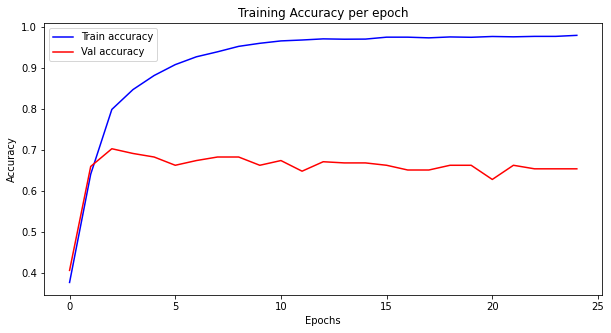

In [101]:
# plot training accuracy chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy per epoch")
plt.plot(training_log['epoch'], training_log['accuracy'], color="blue", label="Train accuracy")
plt.plot(training_log['epoch'], training_log['val_accuracy'], color="red", label="Val accuracy")
plt.legend()
plt.show()

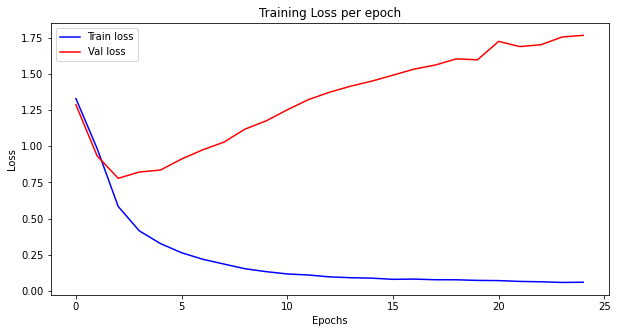

In [103]:
# plot training loss chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss per epoch")
plt.plot(training_log['epoch'], training_log['loss'], color="blue", label="Train loss")
plt.plot(training_log['epoch'], training_log['val_loss'], color="red", label="Val loss")
plt.legend()
plt.show()

From the first plot, we can see that the training accuracy is vary high after the epochs higher than 3. The validation accuracy is still at the same level.However, from the secoend plot, the train loss  foes deown when epochs is higher than 3, and the validation loss increase linearly after epochs is higher than 3. From the both chart, we can see the overfitting occurs. since the validation accuracy doesn't also increase when the train accuracy increases.

### Word2Vector

In [104]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3578,40751,why do i have such a thing for dark curly hAIR,"[why, do, i, have, such, a, thing, for, dark, ..."
204,10204,Forever angry that gh ruined Molly and morgan'...,"[Forever, angry, that, gh, ruined, Molly, and,..."
1481,20624,petrify me in the fossil type of way,"[petrify, me, in, the, fossil, type, of, way]"
1751,20894,On the other side of fear lies freedom! - JB G...,"[On, the, other, side, of, fear, lies, freedom..."
1872,21015,#nana 4 hoco bc my dream since freshman year a...,"[#, nana, 4, hoco, bc, my, dream, since, fresh..."


In [105]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['why', 'do', 'i', 'have', 'such', 'a', 'thing', 'for', 'dark', 'curly', 'hAIR']),
       list(['Forever', 'angry', 'that', 'gh', 'ruined', 'Molly', 'and', 'morgan', "'s", 'bond/friendship', '#', 'bitter']),
       list(['petrify', 'me', 'in', 'the', 'fossil', 'type', 'of', 'way'])],
      dtype=object)

In [106]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3578,40751,why do i have such a thing for dark curly hAIR,"[why, do, i, have, such, a, thing, for, dark, ..."
204,10204,Forever angry that gh ruined Molly and morgan'...,"[Forever, angry, that, gh, ruined, Molly, and,..."
1481,20624,petrify me in the fossil type of way,"[petrify, me, in, the, fossil, type, of, way]"
1751,20894,On the other side of fear lies freedom! - JB G...,"[On, the, other, side, of, fear, lies, freedom..."
1872,21015,#nana 4 hoco bc my dream since freshman year a...,"[#, nana, 4, hoco, bc, my, dream, since, fresh..."


In [107]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [108]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([-0.81141514,  0.6080372 , -0.37354887, -0.45130655,  0.616162  ,
        0.60603935,  0.71945894, -0.49075824,  0.5766269 ,  0.19032602,
        0.9212288 ,  0.24596956, -0.21220343,  0.25009364,  0.4910296 ,
       -0.89649016, -0.25298098,  0.18065813,  0.30240643,  0.00235273,
        0.32880256, -0.00519441,  0.1439273 , -0.0899677 ,  0.7254092 ,
       -0.50758976, -0.5134475 ,  0.300023  ,  0.1945884 ,  0.05977073,
        0.63168263,  0.07912172,  0.79402393, -0.19795378,  0.37460876,
       -0.4380942 ,  0.58128977, -0.02757164,  0.41321546, -0.24663837,
        0.43721792,  0.51981777, -0.1852389 ,  0.4840826 ,  0.06175886,
       -1.0854062 ,  0.42984128,  0.07945319, -0.37070048, -0.75946903,
        0.64253265, -0.19680522, -0.5176169 , -0.5174636 ,  0.64285123,
        0.7547831 , -0.5307983 , -0.24388532, -0.48072225, -0.73629063,
       -0.33617303,  0.18264985,  0.24375631,  0.23903081,  0.6853799 ,
       -0.31347314, -0.8739301 ,  0.11464462, -0.6998975 , -0.49

In [111]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('help', 0.9504680633544922),
 ('.\\nA', 0.9490525722503662),
 ('A4', 0.9423733353614807),
 ('successful', 0.9394973516464233),
 ('Walk', 0.937060534954071),
 ('future', 0.936379075050354),
 ('surfed', 0.9360767602920532),
 ('Be', 0.9318768382072449),
 ('bear', 0.9316584467887878),
 ('ukedchat', 0.9304473400115967)]

In [115]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [118]:
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop = stopwords.words('english')

# define a tokenizer for turning the data to tokenize and deleting the stopwords
def tokenizer(text):
    return [ w for w in re.split('\s+', text.strip()) \
            if w not in stop]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owuser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop = stopwords.words('english')

# define a tokenizer for turning the data to tokenize and deleting the stopwords
def tokenizer(text):
    return [ w for w in re.split('\s+', text.strip()) \
            if w not in stop]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owuser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
train_df['unigrams'] = train_df['text'].apply(tokenizer)
test_df['unigrams'] = test_df['text'].apply(tokenizer)
train_df.head()

,id,text,emotion,intensity,text_tokenized,unigrams
3578,40751,why do i have such a thing for dark curly hAIR,sadness,0.196,"[why, do, i, have, such, a, thing, for, dark, ...","[thing, dark, curly, hAIR]"
204,10204,Forever angry that gh ruined Molly and morgan'...,anger,0.625,"[Forever, angry, that, gh, ruined, Molly, and,...","[Forever, angry, gh, ruined, Molly, morgan's, ..."
1481,20624,petrify me in the fossil type of way,fear,0.458,"[petrify, me, in, the, fossil, type, of, way]","[petrify, fossil, type, way]"
1751,20894,On the other side of fear lies freedom! - JB G...,fear,0.333,"[On, the, other, side, of, fear, lies, freedom...","[On, side, fear, lies, freedom!, -, JB, Glossi..."
1872,21015,#nana 4 hoco bc my dream since freshman year a...,fear,0.250,"[#, nana, 4, hoco, bc, my, dream, since, fresh...","[#nana, 4, hoco, bc, dream, since, freshman, y..."


In [128]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['why', 'do', 'i', 'have', 'such', 'a', 'thing', 'for', 'dark', 'curly', 'hAIR']),
       list(['Forever', 'angry', 'that', 'gh', 'ruined', 'Molly', 'and', 'morgan', "'s", 'bond/friendship', '#', 'bitter']),
       list(['petrify', 'me', 'in', 'the', 'fossil', 'type', 'of', 'way'])],
      dtype=object)

In [129]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3578,40751,why do i have such a thing for dark curly hAIR,"[why, do, i, have, such, a, thing, for, dark, ..."
204,10204,Forever angry that gh ruined Molly and morgan'...,"[Forever, angry, that, gh, ruined, Molly, and,..."
1481,20624,petrify me in the fossil type of way,"[petrify, me, in, the, fossil, type, of, way]"
1751,20894,On the other side of fear lies freedom! - JB G...,"[On, the, other, side, of, fear, lies, freedom..."
1872,21015,#nana 4 hoco bc my dream since freshman year a...,"[#, nana, 4, hoco, bc, my, dream, since, fresh..."


In [130]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [131]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([-0.78340757,  0.5477992 , -0.33878142, -0.2191885 ,  0.72642416,
        0.6684065 ,  0.7447954 , -0.4974863 ,  0.6333947 ,  0.19294247,
        1.0947928 ,  0.31186286, -0.14420773,  0.31446147,  0.7055786 ,
       -1.0690258 , -0.25410834,  0.1731178 ,  0.19965549,  0.00331931,
        0.36536723,  0.15067306,  0.33349165, -0.16726987,  0.6359951 ,
       -0.63994086, -0.4850459 ,  0.09145261,  0.1792584 , -0.03821075,
        0.46044716, -0.03152127,  1.0050437 , -0.21325786,  0.5558512 ,
       -0.32691857,  0.7649948 ,  0.10633539,  0.36757404, -0.3332664 ,
        0.49800012,  0.51130164, -0.2400665 ,  0.5224272 , -0.08451209,
       -1.1610214 ,  0.53234833, -0.10339322, -0.4062882 , -0.66676515,
        0.62148696, -0.29408768, -0.7146855 , -0.5903371 ,  0.6121397 ,
        0.7281481 , -0.5774938 , -0.42367437, -0.6081491 , -0.83946687,
       -0.23765527,  0.10109034,  0.19501509,  0.21991776,  0.64340734,
       -0.38191995, -0.8655205 ,  0.07918129, -0.65759164, -0.77

In [132]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('farm365', 0.9524672031402588),
 ('birthday', 0.9441252946853638),
 ('See', 0.9423666596412659),
 ('bday', 0.9378798007965088),
 ('ukedchat', 0.9368396401405334),
 ('O', 0.9367344975471497),
 ('right', 0.9248443245887756),
 ('pls', 0.9239150285720825),
 ('ole', 0.9232203364372253),
 ('PUSSY\\nP', 0.921825647354126)]

### Clustering: k-means

In [133]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [134]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


In [135]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [136]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

### High-dimension Visualization: t-SNE

In [139]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'birthday', 'thank', 'welcome', 'love', 'miss']
angry_words:  ['angry', 'stupid', 'hate', 'annoying', 'weird', 'like']
data_words:  ['data', 'mobile', 'software', 'search', 'survey', 'web']
mining_words:  ['mining', 'offshore', 'manufacturing', 'pharma', 'agricultural', 'agriculture']

target words: 
['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'data', 'mobile', 'software', 'search', 'survey', 'web', 'mining', 'offshore', 'manufacturing', 'pharma', 'agricultural', 'agriculture']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


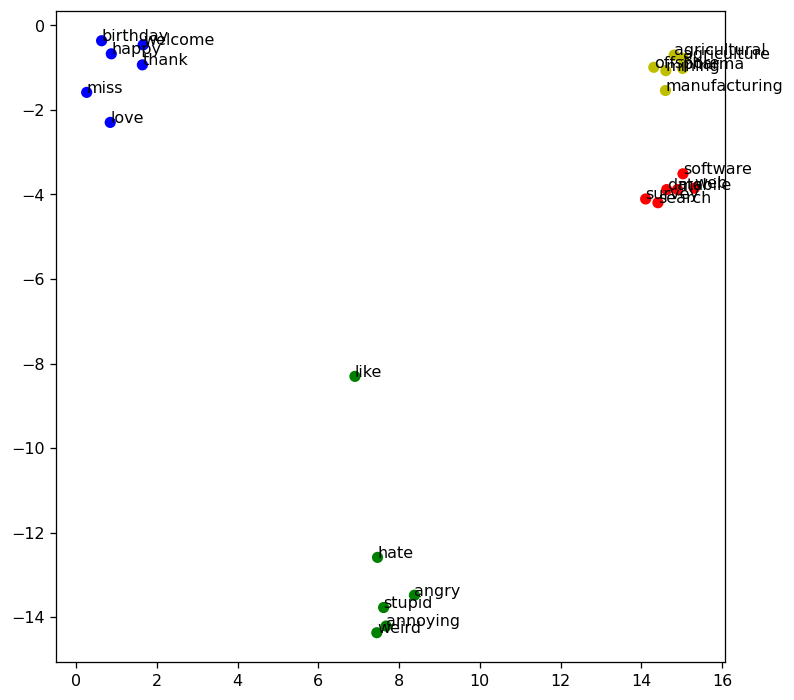

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = glove_twitter_25_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  
​
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [145]:
word_list = ['happy', 'angry', 'data', 'mining']

# find 15 words in each categories
topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

# give each categories a color
print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good', 'dream']
angry_words:  ['angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkward', 'reason', 'because', 'scary', 'seriously', 'retarded']
data_words:  ['data', 'mobile', 'software', 'search', 'survey', 'web', 'server', 'marketing', 'file', 'system', 'google', 'resume', 'unit', 'network', 'panel', 'manual']
mining_words:  ['mining', 'offshore', 'manufacturing', 'pharma', 'agricultural', 'agriculture', 'housing', 'petroleum', 'pipeline', 'infrastructure', 'aviation', 'export', 'biotech', 'pharmaceutical', 'coal', 'telecoms']

target words: 
['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good', 'dream', 'angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkwa

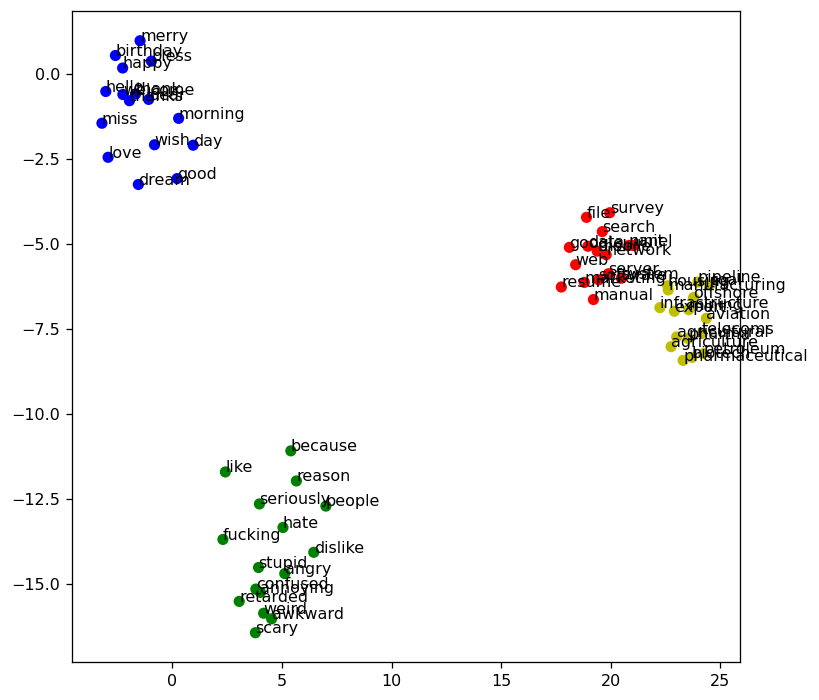

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = glove_twitter_25_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part 2

In [ ]:
# this project is run on the Google Colab

import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import pandas as pd

### training data
data_identification = pd.read_csv("/content/gdrive/MyDrive/DM2021-Lab2-HW2-main/data_identification.csv")
emotion = pd.read_csv("/content/gdrive/MyDrive/DM2021-Lab2-HW2-main/emotion.csv")
submission = pd.read_csv("/content/gdrive/MyDrive/DM2021-Lab2-HW2-main/sampleSubmission.csv")

In [ ]:
!pip install jsonlines
import json
import jsonlines

Text = []
Id = []
print("Started Reading JSON file which contains multiple JSON document")

# use jsonline to read the column in the row text data
with jsonlines.open("/content/gdrive/MyDrive/DM2021-Lab2-HW2-main/tweets_DM.json") as reader:
     for tweet in reader:
        tweet_id = tweet["_source"]["tweet"]["tweet_id"]
        Id.append(tweet_id)
        tweet_text = tweet["_source"]["tweet"]["text"]
        Text.append(tweet_text)

Started Reading JSON file which contains multiple JSON document


In [ ]:
# create a dataframe with id and text
id = pd.DataFrame(Id,columns=['tweet_id'])
text = pd.DataFrame(Text,columns=['text'])
tweet = pd.concat([id, text], axis=1)

In [ ]:
tweet

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [ ]:
emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [ ]:
# show the emtion type and numbers
emotion.groupby(['emotion']).count()['tweet_id']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: tweet_id, dtype: int64

In [ ]:
# show the test/ train numbers
data_identification.groupby(['identification']).count()['tweet_id']

identification
test      411972
train    1455563
Name: tweet_id, dtype: int64

In [ ]:
# merge the "data_identification" and "tweet" columns according to id
df = pd.merge(data_identification,tweet,on='tweet_id')

In [ ]:
df

,tweet_id,identification,text
0,0x28cc61,test,@Habbo I've seen two separate colours of the e...
1,0x29e452,train,Huge Respect🖒 @JohnnyVegasReal talking about l...
2,0x2b3819,train,Yoooo we hit all our monthly goals with the ne...
3,0x2db41f,test,@FoxNews @KellyannePolls No serious self respe...
4,0x2a2acc,train,@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...
...,...,...,...
1867530,0x227e25,train,@BBCBreaking Such an inspirational talented pe...
1867531,0x293813,train,And still #libtards won't get off the guy's ba...
1867532,0x1e1a7e,train,When you sow #seeds of service or hospitality ...
1867533,0x2156a5,train,@lorettalrose Will you be displaying some <LH>...


In [ ]:
# show the emtion type and numbers
emotion.groupby(['emotion']).count()['tweet_id']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: tweet_id, dtype: int64

In [ ]:
test_df = df.loc[(df.identification == "test")]
train_df = df.loc[(df.identification == "train")]

In [ ]:
# create a new column
test_df['emotion'] = ""
test_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet_id,identification,text,emotion
0,0x28cc61,test,@Habbo I've seen two separate colours of the e...,
3,0x2db41f,test,@FoxNews @KellyannePolls No serious self respe...,
15,0x2466f6,test,"Looking for a new car, and it says 1 lady owne...",
23,0x23f9e9,test,@cineworld “only the brave” just out and fount...,
31,0x1fb4e1,test,Felt like total dog 💩 going into open gym and ...,
...,...,...,...,...
1867495,0x2c4dc2,test,6 year old walks in astounded. Mum! Look how b...,
1867496,0x31be7c,test,Only one week to go until the #inspiringvolunt...,
1867500,0x1ca58e,test,"I just got caught up with the manga for ""My He...",
1867515,0x35c8ba,test,Speak only when spoken to and make hot ass mus...,


In [ ]:
# merge the "train_df" and "emition" columns according to id
train_df = pd.merge(train_df,emotion,on='tweet_id')
train_df

,tweet_id,identification,text,emotion
0,0x29e452,train,Huge Respect🖒 @JohnnyVegasReal talking about l...,joy
1,0x2b3819,train,Yoooo we hit all our monthly goals with the ne...,joy
2,0x2a2acc,train,@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...,trust
3,0x2a8830,train,Come join @ambushman27 on #PUBG while he striv...,joy
4,0x20b21d,train,@fanshixieen2014 Blessings!My #strength little...,anticipation
...,...,...,...,...
1455558,0x227e25,train,@BBCBreaking Such an inspirational talented pe...,disgust
1455559,0x293813,train,And still #libtards won't get off the guy's ba...,sadness
1455560,0x1e1a7e,train,When you sow #seeds of service or hospitality ...,joy
1455561,0x2156a5,train,@lorettalrose Will you be displaying some <LH>...,trust


In [ ]:
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (1455563, 4)
Shape of Testing df:  (411972, 4)


In [ ]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# check the result
train_data_BOW_features

<1455563x794247 sparse matrix of type '<class 'numpy.int64'>'
	with 18849355 stored elements in Compressed Sparse Row format>

In [ ]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [ ]:
# check the dimension
train_data_BOW_features.shape

(1455563, 794247)

In [ ]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['005',
 '00533321',
 '00575',
 '00578',
 '005796',
 '005e5n',
 '006',
 '0060',
 '007',
 '00786mujahid']

In [ ]:
import nltk
nltk.download('punkt')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


(1455563, 500)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 500)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 500)
y_test.shape:  (411972,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'trust', 'disgust', 'disgust', 'trust', 'joy', 'trust',
       'sadness', 'joy', 'sadness'], dtype=object)

In [ ]:
print(type(y_test_pred))

<class 'numpy.ndarray'>


In [ ]:
result_df = pd.DataFrame(y_test_pred, columns=['emotion'])
result_df

,emotion
0,sadness
1,trust
2,disgust
3,disgust
4,trust
...,...
411967,anticipation
411968,joy
411969,joy
411970,joy


In [ ]:
test_df = df.loc[(df.identification == "test")]
test_df.reset_index(inplace=True, drop=True)
#test_df = test_df.drop(['emotion'], axis=1)
test_df
final = pd.concat([test_df, result_df], axis=1)
final

,tweet_id,identification,text,emotion
0,0x28cc61,test,@Habbo I've seen two separate colours of the e...,sadness
1,0x2db41f,test,@FoxNews @KellyannePolls No serious self respe...,trust
2,0x2466f6,test,"Looking for a new car, and it says 1 lady owne...",disgust
3,0x23f9e9,test,@cineworld “only the brave” just out and fount...,disgust
4,0x1fb4e1,test,Felt like total dog 💩 going into open gym and ...,trust
...,...,...,...,...
411967,0x2c4dc2,test,6 year old walks in astounded. Mum! Look how b...,anticipation
411968,0x31be7c,test,Only one week to go until the #inspiringvolunt...,joy
411969,0x1ca58e,test,"I just got caught up with the manga for ""My He...",joy
411970,0x35c8ba,test,Speak only when spoken to and make hot ass mus...,joy


In [ ]:
final['id'] = final['tweet_id']
final

,tweet_id,identification,text,emotion,id
0,0x28cc61,test,@Habbo I've seen two separate colours of the e...,sadness,0x28cc61
1,0x2db41f,test,@FoxNews @KellyannePolls No serious self respe...,trust,0x2db41f
2,0x2466f6,test,"Looking for a new car, and it says 1 lady owne...",disgust,0x2466f6
3,0x23f9e9,test,@cineworld “only the brave” just out and fount...,disgust,0x23f9e9
4,0x1fb4e1,test,Felt like total dog 💩 going into open gym and ...,trust,0x1fb4e1
...,...,...,...,...,...
411967,0x2c4dc2,test,6 year old walks in astounded. Mum! Look how b...,anticipation,0x2c4dc2
411968,0x31be7c,test,Only one week to go until the #inspiringvolunt...,joy,0x31be7c
411969,0x1ca58e,test,"I just got caught up with the manga for ""My He...",joy,0x1ca58e
411970,0x35c8ba,test,Speak only when spoken to and make hot ass mus...,joy,0x35c8ba


In [ ]:
# delete the useful column "emotion"
submission = submission.drop(['emotion'], axis=1)
submission

,id
0,0x2c7743
1,0x2c1eed
2,0x2826ea
3,0x356d9a
4,0x20fd95
...,...
411967,0x351857
411968,0x2c028e
411969,0x1f2430
411970,0x2be24e


In [ ]:
# merge the "submission" and "final" column
submission_df = pd.merge(submission,final,on='id')

# delete the useful column 'tweet_id', 'identification','text'
submission_df = submission_df.drop(['tweet_id', 'identification','text'], axis=1)
submission_df

,id,emotion
0,0x2c7743,trust
1,0x2c1eed,anticipation
2,0x2826ea,anticipation
3,0x356d9a,sadness
4,0x20fd95,disgust
...,...,...
411967,0x351857,disgust
411968,0x2c028e,sadness
411969,0x1f2430,anticipation
411970,0x2be24e,disgust


In [ ]:
submission_df.to_csv('/content/gdrive/MyDrive/DM2021-Lab2-HW2-main/submission.csv')

# Part 3

## Data Preprocessing

### Combine the text

In [1]:
import pandas as pd 
import os
path = "dataPrivateComplete"
files = os.listdir(path)
txts = []
for file in files:
    position = path + '\\' + file
    with open(position, "r", encoding = 'utf-8') as f:
        data = f.read()
        ndf = pd.DataFrame([{'Num':file.split('.txt')[0],
                             'Content':data}],
                            columns = ['Num', 'Content'])
        txts.append(ndf)

In [2]:
test = pd.concat(txts, ignore_index=True)
test.to_csv('stage3_origin.csv', encoding='utf_8_sig')

### Extract the Keywords

In [3]:
import pandas as pd 
df_test = pd.read_csv('stage3_origin.csv', encoding='utf_8_sig', index_col=0) 
df_test = df_test.replace('\n',' ', regex=True)
df_test = df_test.replace('\x7f','', regex=True)
df_test

,Num,Content
0,100,發布本(107)年第1期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...
1,1002,敏督利颱風過境，請嚴防農作物疫病蟲害蔓延 九十三年七月九日動植物防疫檢疫局發布之新聞稿行政院...
2,1003,福壽螺防治有撇步，向禁藥-三苯醋錫說不 農委會防檢局表示，台灣各地已陸續進入水稻插秧期，針對...
3,101,發布本(107)年度第1期水稻二化螟蟲發生預報，請查照。 本(107)年度三月下旬及四月上旬...
4,1013,斜紋夜蛾進入高峰警戒期 防檢局籲請雲嘉南地區加強防治 號稱行軍蟲的斜紋夜蛾目前已進入發生高...
...,...,...
415,982,風災過後請嚴防農作物疫病蟲害侵襲 風災過後請嚴防農作物疫病蟲害侵襲納莉颱風來襲，挾帶連日豪雨...
416,983,台南場於9月14日發佈水稻紋枯病、白葉枯病及縱捲葉蟲警報 1.台南區良場於9月14日發佈水稻...
417,989,共同防治竹筍盲椿象，提高竹筍產量與品質 共同防治竹筍盲椿象，提高竹筍產量與品質為確保竹筍品質...
418,99,發布本(106)年第一期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...


In [4]:
import re
chem = [line.strip() for line in open("Keywords/Keywords/chem.txt", 'r', encoding='utf-8').readlines()]
crop = [line.strip() for line in open("Keywords/Keywords/crop.txt", 'r', encoding='utf-8').readlines()]
pest = [line.strip() for line in open("Keywords/Keywords/pest.txt", 'r', encoding='utf-8').readlines()]
b=[]
for index_1,review in enumerate(df_test['Content']):
    review = str(review)
    a=[]
    # determine if there is chem in the sentence
    if any(i in review for i in chem):
        a.append('chem')
    # determine if there is crop in the sentence
    if any(i in review for i in crop):
        a.append('crop')
    # determine if there is pest in the sentence
    if any(i in review for i in pest):
        a.append('pest')
    b.append(a)
df_test["Dimension"]=b
df_test

,Num,Content,Dimension
0,100,發布本(107)年第1期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...,"[chem, crop, pest]"
1,1002,敏督利颱風過境，請嚴防農作物疫病蟲害蔓延 九十三年七月九日動植物防疫檢疫局發布之新聞稿行政院...,"[chem, crop, pest]"
2,1003,福壽螺防治有撇步，向禁藥-三苯醋錫說不 農委會防檢局表示，台灣各地已陸續進入水稻插秧期，針對...,"[chem, crop, pest]"
3,101,發布本(107)年度第1期水稻二化螟蟲發生預報，請查照。 本(107)年度三月下旬及四月上旬...,"[chem, crop, pest]"
4,1013,斜紋夜蛾進入高峰警戒期 防檢局籲請雲嘉南地區加強防治 號稱行軍蟲的斜紋夜蛾目前已進入發生高...,"[chem, crop, pest]"
...,...,...,...
415,982,風災過後請嚴防農作物疫病蟲害侵襲 風災過後請嚴防農作物疫病蟲害侵襲納莉颱風來襲，挾帶連日豪雨...,"[crop, pest]"
416,983,台南場於9月14日發佈水稻紋枯病、白葉枯病及縱捲葉蟲警報 1.台南區良場於9月14日發佈水稻...,"[crop, pest]"
417,989,共同防治竹筍盲椿象，提高竹筍產量與品質 共同防治竹筍盲椿象，提高竹筍產量與品質為確保竹筍品質...,"[chem, crop, pest]"
418,99,發布本(106)年第一期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...,"[crop, pest]"


In [5]:
# find the keyword in each sentence

a=[]
for index,review in enumerate(df_test['Content']):
    review = str(review)
    b=[]
    for i in chem:
        if review.find(i) != -1:
            
            x = re.findall(i,review)
            b=b+x
    for i in crop:
        if review.find(i) != -1:
            x = re.findall(i,review)
            b=b+x
    for i in pest:
        if review.find(i) != -1:
            x = re.findall(i,review)
            b=b+x
    a.append(b)
df_test["Dimension2"]=a

In [6]:
df_test

,Num,Content,Dimension,Dimension2
0,100,發布本(107)年第1期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...,"[chem, crop, pest]","[三賽唑, 三賽唑, 三賽唑可濕性粉劑, 三賽唑可濕性粉劑, 三賽唑可濕性粉, 三賽唑可濕性..."
1,1002,敏督利颱風過境，請嚴防農作物疫病蟲害蔓延 九十三年七月九日動植物防疫檢疫局發布之新聞稿行政院...,"[chem, crop, pest]","[含毒甲基丁香油, 毒甲基丁香油, 甲基丁香油, 丁香油, 水稻, 蔬菜, 果樹, 芒果, ..."
2,1003,福壽螺防治有撇步，向禁藥-三苯醋錫說不 農委會防檢局表示，台灣各地已陸續進入水稻插秧期，針對...,"[chem, crop, pest]","[耐克螺, 耐克螺可濕性粉劑, 聚乙醛, 聚乙醛, 聚乙醛可濕性粉劑, 聚乙醛餌劑, 聚乙醛..."
3,101,發布本(107)年度第1期水稻二化螟蟲發生預報，請查照。 本(107)年度三月下旬及四月上旬...,"[chem, crop, pest]","[培丹, 培丹粒劑, 撲滅松, 撲滅松乳劑, 滅松乳劑, 水稻, 水稻, 水稻, 水稻, 水..."
4,1013,斜紋夜蛾進入高峰警戒期 防檢局籲請雲嘉南地區加強防治 號稱行軍蟲的斜紋夜蛾目前已進入發生高...,"[chem, crop, pest]","[性費洛蒙, 費洛蒙, 蔬菜, 豆類, 雜糧, 綠肥作物, 綠肥作物, 斜紋夜蛾, 斜紋夜蛾..."
...,...,...,...,...
415,982,風災過後請嚴防農作物疫病蟲害侵襲 風災過後請嚴防農作物疫病蟲害侵襲納莉颱風來襲，挾帶連日豪雨...,"[crop, pest]","[水稻, 水稻, 青蔥, 蔥, 果樹, 桃, 楊桃, 番石榴, 蔬果類, 蔬果類, 甜菜夜蛾..."
416,983,台南場於9月14日發佈水稻紋枯病、白葉枯病及縱捲葉蟲警報 1.台南區良場於9月14日發佈水稻...,"[crop, pest]","[水稻, 水稻, 水稻, 捲葉蟲, 捲葉蟲, 縱捲葉蟲, 縱捲葉蟲, 白葉枯病, 白葉枯病,..."
417,989,共同防治竹筍盲椿象，提高竹筍產量與品質 共同防治竹筍盲椿象，提高竹筍產量與品質為確保竹筍品質...,"[chem, crop, pest]","[滅賜松, 滅賜松乳劑, 芬化利乳劑, 撲芬松, 撲芬松乳劑, 竹筍, 竹筍, 竹筍, 竹筍..."
418,99,發布本(106)年第一期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...,"[crop, pest]","[水稻, 水稻, 水稻, 水稻, 水稻, 桃, 稻熱病, 稻熱病, 稻熱病, 稻熱病, 葉稻..."


In [7]:
df_test.to_csv('stage3_keyword.csv', encoding='utf_8_sig', index=False)

### Extract the Keywords (other way)

In [8]:
import pandas as pd 
df_test = pd.read_csv('stage3_origin.csv', encoding='utf_8_sig', index_col=0) 
df_test = df_test.replace('\n',' ', regex=True)
df_test = df_test.replace('\x7f','', regex=True)
df_test

,Num,Content
0,100,發布本(107)年第1期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...
1,1002,敏督利颱風過境，請嚴防農作物疫病蟲害蔓延 九十三年七月九日動植物防疫檢疫局發布之新聞稿行政院...
2,1003,福壽螺防治有撇步，向禁藥-三苯醋錫說不 農委會防檢局表示，台灣各地已陸續進入水稻插秧期，針對...
3,101,發布本(107)年度第1期水稻二化螟蟲發生預報，請查照。 本(107)年度三月下旬及四月上旬...
4,1013,斜紋夜蛾進入高峰警戒期 防檢局籲請雲嘉南地區加強防治 號稱行軍蟲的斜紋夜蛾目前已進入發生高...
...,...,...
415,982,風災過後請嚴防農作物疫病蟲害侵襲 風災過後請嚴防農作物疫病蟲害侵襲納莉颱風來襲，挾帶連日豪雨...
416,983,台南場於9月14日發佈水稻紋枯病、白葉枯病及縱捲葉蟲警報 1.台南區良場於9月14日發佈水稻...
417,989,共同防治竹筍盲椿象，提高竹筍產量與品質 共同防治竹筍盲椿象，提高竹筍產量與品質為確保竹筍品質...
418,99,發布本(106)年第一期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...


In [9]:
chem = [line.strip() for line in open("Keywords/Keywords/chem.txt", 'r', encoding='utf-8').readlines()]
crop = [line.strip() for line in open("Keywords/Keywords/crop.txt", 'r', encoding='utf-8').readlines()]
pest = [line.strip() for line in open("Keywords/Keywords/pest.txt", 'r', encoding='utf-8').readlines()]

# find the keyword in the sentence
d=[]
for index,review in enumerate(df_test['Content']):
    review = str(review)
    c=[]
    for i in chem:
        if review.find(i) != -1:
            c.append(i)
    for i in crop:
        if review.find(i) != -1:
            c.append(i)
    for i in pest:
        if review.find(i) != -1:
            c.append(i)
    d.append(c)
df_test["Dimension"]=d

In [10]:
df_test

,Num,Content,Dimension
0,100,發布本(107)年第1期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...,"[三賽唑, 三賽唑可濕性粉劑, 三賽唑可濕性粉, 賽唑可濕性粉劑, 亞賜圃, 亞賜圃可濕性粉..."
1,1002,敏督利颱風過境，請嚴防農作物疫病蟲害蔓延 九十三年七月九日動植物防疫檢疫局發布之新聞稿行政院...,"[含毒甲基丁香油, 毒甲基丁香油, 甲基丁香油, 丁香油, 水稻, 蔬菜, 果樹, 芒果, ..."
2,1003,福壽螺防治有撇步，向禁藥-三苯醋錫說不 農委會防檢局表示，台灣各地已陸續進入水稻插秧期，針對...,"[耐克螺, 耐克螺可濕性粉劑, 聚乙醛, 聚乙醛可濕性粉劑, 聚乙醛餌劑, 聚乙醛可濕性粉劑..."
3,101,發布本(107)年度第1期水稻二化螟蟲發生預報，請查照。 本(107)年度三月下旬及四月上旬...,"[培丹, 培丹粒劑, 撲滅松, 撲滅松乳劑, 滅松乳劑, 水稻, 桃, 螟蟲, 二化螟]"
4,1013,斜紋夜蛾進入高峰警戒期 防檢局籲請雲嘉南地區加強防治 號稱行軍蟲的斜紋夜蛾目前已進入發生高...,"[性費洛蒙, 費洛蒙, 蔬菜, 豆類, 雜糧, 綠肥作物, 斜紋夜蛾, 行軍蟲]"
...,...,...,...
415,982,風災過後請嚴防農作物疫病蟲害侵襲 風災過後請嚴防農作物疫病蟲害侵襲納莉颱風來襲，挾帶連日豪雨...,"[水稻, 青蔥, 蔥, 果樹, 桃, 楊桃, 番石榴, 蔬果類, 甜菜夜蛾, 軟腐病, 疫病..."
416,983,台南場於9月14日發佈水稻紋枯病、白葉枯病及縱捲葉蟲警報 1.台南區良場於9月14日發佈水稻...,"[水稻, 捲葉蟲, 縱捲葉蟲, 白葉枯病, 紋枯病]"
417,989,共同防治竹筍盲椿象，提高竹筍產量與品質 共同防治竹筍盲椿象，提高竹筍產量與品質為確保竹筍品質...,"[滅賜松, 滅賜松乳劑, 芬化利乳劑, 撲芬松, 撲芬松乳劑, 竹筍, 竹盲椿象]"
418,99,發布本(106)年第一期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...,"[水稻, 桃, 稻熱病, 葉稻熱病]"


In [11]:
df_test.to_csv('stage3_only_keyword.csv', encoding='utf_8_sig', index=False)

### Data Preprocessing

In [12]:
import pandas as pd 
df_test = pd.read_csv('stage3_origin.csv', encoding='utf_8_sig', index_col=0) 
df_test = df_test.replace('\n',' ', regex=True)
df_test = df_test.replace('\x7f','', regex=True)
df_test

,Num,Content
0,100,發布本(107)年第1期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...
1,1002,敏督利颱風過境，請嚴防農作物疫病蟲害蔓延 九十三年七月九日動植物防疫檢疫局發布之新聞稿行政院...
2,1003,福壽螺防治有撇步，向禁藥-三苯醋錫說不 農委會防檢局表示，台灣各地已陸續進入水稻插秧期，針對...
3,101,發布本(107)年度第1期水稻二化螟蟲發生預報，請查照。 本(107)年度三月下旬及四月上旬...
4,1013,斜紋夜蛾進入高峰警戒期 防檢局籲請雲嘉南地區加強防治 號稱行軍蟲的斜紋夜蛾目前已進入發生高...
...,...,...
415,982,風災過後請嚴防農作物疫病蟲害侵襲 風災過後請嚴防農作物疫病蟲害侵襲納莉颱風來襲，挾帶連日豪雨...
416,983,台南場於9月14日發佈水稻紋枯病、白葉枯病及縱捲葉蟲警報 1.台南區良場於9月14日發佈水稻...
417,989,共同防治竹筍盲椿象，提高竹筍產量與品質 共同防治竹筍盲椿象，提高竹筍產量與品質為確保竹筍品質...
418,99,發布本(106)年第一期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...


In [13]:
# change the data type
doc_complete = df_test.Content.values.tolist()
doc_complete[0]

'發布本(107)年第1期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依據本場研究人員巡迴調查水稻疫情結果，轄區部分地區已發生水稻葉稻熱病，且近期氣候符合發病條件，為避免病害迅速蔓延，請儘速宣導水稻產銷班及稻農注意防治，確保稻作生產。水稻病蟲害發生預報107年第1號-水稻葉稻熱病發生與推薦防治藥劑詳如附件。 一、不可過度施用氮肥，以免稻熱病迅速蔓延。二、發現稻熱病病斑，應即施藥，如病勢持續蔓延，應再噴施藥劑防治。三、防治藥劑：40％甲基多保淨水懸劑、20％芬諾尼水懸劑、5%嘉賜黴素可濕性粉劑、33％克熱賜圃可濕性粉劑、20%嘉賜三賽唑可濕性粉劑、50%富米熱斯可濕性粉劑、54%保米熱斯可濕性粉劑、50%護粒三賽唑可濕性粉劑、17%丙基喜樂松粒劑、40%亞賜圃可濕性粉劑，或參考植物保護手冊任選1種藥劑防治。 '

In [20]:
import wget,os
#os.mkdir(mydrive+ "chinese") # you have to remove this line if the chinese folder is exist.
url_bigdict = 'https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big'

wget.download(url_bigdict)

100% [..........................................................................] 8583143 / 8583143

'dict.txt (1).big'

In [14]:
# use "jieba" to cut the sentence
import jieba
jieba.set_dictionary('dict.txt.big')
jieba.load_userdict('Keywords/Keywords/chem.txt')
jieba.load_userdict('Keywords/Keywords/crop.txt')
jieba.load_userdict('Keywords/Keywords/pest.txt')
def sent_to_words(sentences):
    for sentence in sentences:
        chinese_token = jieba.cut(sentence)
        yield( [char for char in chinese_token if char !='，' and char !='。'] )

data_words = list(sent_to_words(doc_complete))
print(data_words[0])

Building prefix dict from C:\Users\lindy\BTS\AI_Crop\dict.txt.big ...
Loading model from cache C:\Users\lindy\AppData\Local\Temp\jieba.ua19e013dddc50835910efd0b5723658a.cache
Loading model cost 1.059 seconds.
Prefix dict has been built successfully.


['發布本', '(', '107', ')', '年', '第', '1', '期作', '水稻', '葉稻熱病', '發生', '預報', '桃園', '區農', '改場', '、', '防檢局', '及', '田邊', '好幫手', '關心', '您', ' ', '依據', '本場', '研究', '人員', '巡迴', '調查', '水稻', '疫情', '結果', '轄區', '部分', '地區', '已', '發生', '水稻', '葉稻熱病', '且', '近期', '氣候', '符合', '發病', '條件', '為', '避免', '病害', '迅速', '蔓延', '請', '儘速', '宣導', '水稻', '產銷', '班及', '稻農', '注意', '防治', '確保', '稻作', '生產', '水稻', '病蟲害', '發生', '預報', '107', '年', '第', '1', '號', '-', '水稻', '葉稻熱病', '發生', '與', '推薦', '防治', '藥劑', '詳如', '附件', ' ', '一', '、', '不可', '過度', '施用', '氮肥', '以免', '稻熱病', '迅速', '蔓延', '二', '、', '發現', '稻熱病', '病斑', '應即', '施藥', '如', '病勢', '持續', '蔓延', '應', '再', '噴施', '藥劑', '防治', '三', '、', '防治', '藥劑', '：', '40', '％', '甲基多保淨水懸劑', '、', '20', '％', '芬諾尼水懸劑', '、', '5%', '嘉賜黴素可濕性粉劑', '、', '33', '％', '克熱賜圃可濕性粉劑', '、', '20%', '嘉賜三賽唑可濕性粉劑', '、', '50%', '富米熱斯可濕性粉劑', '、', '54%', '保米熱斯可濕性粉劑', '、', '50%', '護粒三賽唑可濕性粉劑', '、', '17%', '丙基喜樂松粒劑', '、', '40%', '亞賜圃可濕性粉劑', '或', '參考', '植物保護', '手冊', '任選', '1', '種', '藥劑', '防治', ' ']


In [15]:
# import the stopwords, use the this text file to remove the useless words in the sentence
import requests
url = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-zh/master/stopwords-zh.txt'
r = requests.get(url, allow_redirects=True)
open('chinese_stopwords.txt', 'wb').write(r.content)
zn_stopwords_path = "chinese_stopwords.txt" #簡字
zn_stopwords = [line.strip() for line in open(zn_stopwords_path, 'r', encoding='utf-8').readlines()]

cn_stopwords_path="chinese_stopwords2.txt"
cn_stopwords = [line.strip() for line in open(cn_stopwords_path, 'r', encoding='utf-8').readlines()]

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
stopwords = cn_stopwords + en_stopwords + zn_stopwords
# print(stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lindy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# do the text bigram ans trigram
import gensim
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['發布本', '(', '107', ')', '年', '第_1', '期作', '水稻_葉稻熱病', '發生', '預報', '桃園', '區農_改場', '、_防檢局_及_田邊', '好幫手_關心', '您_ ', '依據_本場_研究_人員', '巡迴_調查', '水稻', '疫情_結果', '轄區', '部分_地區', '已', '發生', '水稻_葉稻熱病', '且', '近期_氣候', '符合', '發病_條件', '為_避免', '病害', '迅速_蔓延', '請', '儘速_宣導', '水稻', '產銷', '班及', '稻農_注意', '防治', '確保', '稻作_生產', '水稻', '病蟲害', '發生', '預報', '107', '年', '第_1', '號', '-', '水稻_葉稻熱病', '發生_與', '推薦', '防治', '藥劑', '詳如', '附件', ' ', '一', '、', '不可_過度', '施用_氮肥', '以免', '稻熱病', '迅速_蔓延', '二', '、', '發現_稻熱病', '病斑', '應即_施藥', '如', '病勢', '持續', '蔓延', '應', '再', '噴施', '藥劑', '防治', '三', '、', '防治', '藥劑', '：', '40_％', '甲基多保淨水懸劑', '、', '20_％', '芬諾尼水懸劑', '、', '5%', '嘉賜黴素可濕性粉劑', '、', '33_％', '克熱賜圃可濕性粉劑', '、', '20%_嘉賜三賽唑可濕性粉劑', '、', '50%_富米熱斯可濕性粉劑', '、', '54%_保米熱斯可濕性粉劑', '、', '50%_護粒三賽唑可濕性粉劑', '、', '17%', '丙基喜樂松粒劑', '、', '40%_亞賜圃可濕性粉劑', '或_參考_植物保護', '手冊', '任選', '1', '種', '藥劑', '防治', ' ']


In [17]:
def remove_stopwords(texts):
    return [[word for word in jieba.cut(str(doc)) if word not in stopwords and word.isalnum()] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [18]:
# Remove Stop Words
data_words_nostops = list(remove_stopwords(data_words))

# Form Bigrams
data_words_trigrams = make_trigrams(data_words_nostops)

print(data_words_trigrams[0])

['發布本', '107', '期作', '水稻_葉稻熱病', '發生', '預報', '桃園', '區農_改場', '防檢局', '田邊_好幫手', '關心', '依據_本場_研究_人員', '巡迴_調查', '水稻', '疫情', '轄區', '部分_地區', '發生', '水稻_葉稻熱病', '近期_氣候', '符合', '發病_條件', '避免', '病害', '迅速_蔓延', '請', '儘速_宣導', '水稻', '產銷', '班及', '稻農_注意', '防治', '確保', '稻作_生產', '水稻', '病蟲害', '發生', '預報', '107', '號', '水稻_葉稻熱病', '發生', '推薦', '防治', '藥劑', '詳如', '附件', '不可_過度', '施用_氮肥', '稻熱病', '迅速_蔓延', '發現_稻熱病', '病斑', '應即_施藥', '病勢', '持續', '蔓延', '應', '噴施', '藥劑', '防治', '防治', '藥劑', '40', '甲基多保淨水懸劑', '20', '芬諾尼水懸劑', '嘉賜黴素可濕性粉劑', '33', '克熱賜圃可濕性粉劑', '嘉賜三賽唑可濕性粉劑', '富米熱斯可濕性粉劑', '保米熱斯可濕性粉劑', '護粒三賽唑可濕性粉劑', '丙基喜樂松粒劑', '亞賜圃可濕性粉劑', '參考_植物保護_手冊', '任選', '種', '藥劑', '防治']


In [19]:
df_test["Meaning_word"] = data_words_trigrams

In [20]:
df_test

,Num,Content,Meaning_word
0,100,發布本(107)年第1期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...,"[發布本, 107, 期作, 水稻_葉稻熱病, 發生, 預報, 桃園, 區農_改場, 防檢局..."
1,1002,敏督利颱風過境，請嚴防農作物疫病蟲害蔓延 九十三年七月九日動植物防疫檢疫局發布之新聞稿行政院...,"[敏督利, 颱風_過境, 請_嚴防, 農作物_疫, 病蟲害, 蔓延, 十三年, 七月, 九日..."
2,1003,福壽螺防治有撇步，向禁藥-三苯醋錫說不 農委會防檢局表示，台灣各地已陸續進入水稻插秧期，針對...,"[福壽螺, 防治, 撇步, 禁藥, 三苯醋, 錫, 說, 農委會, 防檢局_表示, 台灣, ..."
3,101,發布本(107)年度第1期水稻二化螟蟲發生預報，請查照。 本(107)年度三月下旬及四月上旬...,"[發布本, 107, 年度, 期, 水稻, 二化螟_蟲, 發生, 預報, 請, 查照, 10..."
4,1013,斜紋夜蛾進入高峰警戒期 防檢局籲請雲嘉南地區加強防治 號稱行軍蟲的斜紋夜蛾目前已進入發生高...,"[斜紋夜蛾, 進入, 高峰, 警戒, 期, 防檢局, 籲請, 雲_嘉南_地區, 加強, 防治..."
...,...,...,...
415,982,風災過後請嚴防農作物疫病蟲害侵襲 風災過後請嚴防農作物疫病蟲害侵襲納莉颱風來襲，挾帶連日豪雨...,"[風災, 過後, 請_嚴防, 農作物_疫, 病蟲害, 侵襲, 風災, 過後, 請_嚴防, 農..."
416,983,台南場於9月14日發佈水稻紋枯病、白葉枯病及縱捲葉蟲警報 1.台南區良場於9月14日發佈水稻...,"[台南_場於, 14, 發佈_水稻, 紋枯病, 白葉枯病, 縱捲葉蟲, 警報, 台南, 區良..."
417,989,共同防治竹筍盲椿象，提高竹筍產量與品質 共同防治竹筍盲椿象，提高竹筍產量與品質為確保竹筍品質...,"[共同_防治, 竹筍, 盲椿象, 提高, 竹筍, 產量, 品質, 共同_防治, 竹筍, 盲椿..."
418,99,發布本(106)年第一期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...,"[發布本, 106, 第一期_作, 水稻_葉稻熱病, 發生, 預報, 桃園, 區農_改場, ..."


In [21]:
df_test.to_csv('stage3_unigram.csv', encoding='utf_8_sig', index=False)

## Labeling

In [1]:
import pandas as pd
import numpy as np
import collections
import ast

In [2]:
chem_df = pd.read_excel("02chem.list.xlsx",engine='openpyxl', header=None)
crop_df = pd.read_excel("02crop.list.xlsx",engine='openpyxl', header=None)
pest_df = pd.read_excel("02pest.list.xlsx",engine='openpyxl', header=None)

In [25]:
# 764 rows of keywords
keyword_df = pd.concat([chem_df, crop_df, pest_df])
keyword_df = keyword_df.reset_index()
del keyword_df['index']
keyword_df

,0,1,2,3,4,5,6
0,貝芬硫醌,貝芬硫可濕性粉劑,貝芬硫琨,NaN,NaN,NaN,NaN
1,腈硫醌,硫水懸劑,硫水分散性粒劑,硫可濕性粉劑,腈硫醌水懸劑,睛硫琨水懸劑,腈硫醌可濕性粉劑
2,鋅錳乃浦,鋅錳乃浦水懸劑,鋅錳乃浦可濕性粉劑,鋅錳乃普水懸劑,NaN,NaN,NaN
3,性費洛蒙,費洛蒙,性費洛,費洛蒙緩釋劑,NaN,NaN,NaN
4,蘇力菌,蘇力菌水分散性粒劑,蘇力菌可濕性粉劑,生物製劑蘇力菌,蘇力菌製劑,NaN,NaN
...,...,...,...,...,...,...,...
759,姬黃薊馬,NaN,NaN,NaN,NaN,NaN,NaN
760,猝倒病,NaN,NaN,NaN,NaN,NaN,NaN
761,路易氏始葉螨,NaN,NaN,NaN,NaN,NaN,NaN
762,大螟,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# read in article
article_df = pd.read_csv("stage3_only_keyword.csv")
## only takes the keywords data in
article_sr = article_df['Dimension']

In [29]:
test_sr = article_sr#[0:5]
test_df = keyword_df#[0:100]
# you can set the range to test a bit
# test_sr = article_sr
# test_df = keyword_df

In [30]:
test_sr[0]

"['三賽唑', '三賽唑可濕性粉劑', '三賽唑可濕性粉', '賽唑可濕性粉劑', '亞賜圃', '亞賜圃可濕性粉劑', '嘉賜黴素', '嘉賜黴素可濕性粉劑', '甲基多保淨', '甲基多保淨水懸劑', '嘉賜三賽唑', '嘉賜三賽唑可濕性粉劑', '賜三賽唑可濕性粉劑', '護粒三賽唑', '護粒三賽唑可濕性粉劑', '保米熱斯', '保米熱斯可濕性粉劑', '丙基喜樂松', '丙基喜樂松粒劑', '富米熱斯', '富米熱斯可濕性粉劑', '克熱賜圃', '克熱賜圃可濕性粉劑', '芬諾尼', '芬諾尼水懸劑', '水稻', '桃', '稻熱病', '葉稻熱病']"

In [31]:
test_df

,0,1,2,3,4,5,6
0,貝芬硫醌,貝芬硫可濕性粉劑,貝芬硫琨,NaN,NaN,NaN,NaN
1,腈硫醌,硫水懸劑,硫水分散性粒劑,硫可濕性粉劑,腈硫醌水懸劑,睛硫琨水懸劑,腈硫醌可濕性粉劑
2,鋅錳乃浦,鋅錳乃浦水懸劑,鋅錳乃浦可濕性粉劑,鋅錳乃普水懸劑,NaN,NaN,NaN
3,性費洛蒙,費洛蒙,性費洛,費洛蒙緩釋劑,NaN,NaN,NaN
4,蘇力菌,蘇力菌水分散性粒劑,蘇力菌可濕性粉劑,生物製劑蘇力菌,蘇力菌製劑,NaN,NaN
...,...,...,...,...,...,...,...
759,姬黃薊馬,NaN,NaN,NaN,NaN,NaN,NaN
760,猝倒病,NaN,NaN,NaN,NaN,NaN,NaN
761,路易氏始葉螨,NaN,NaN,NaN,NaN,NaN,NaN
762,大螟,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# this is for counting appearance
whole_list = []
for index, article_keywords in test_sr.items():
    simple_list = []
    article_keywords = ast.literal_eval(article_keywords)
    for idx, row in test_df.iterrows():
        compared_elements = list(row)
        if any(x in compared_elements for x in article_keywords):
            simple_list.append(1)
            #print("--------")
            
            
        else:
            simple_list.append(0)
    #print("=========")
    #print(simple_list)
    whole_list.append(simple_list)

    


In [15]:
# this is for counting tf
whole_list = []
for index, article_keywords in test_sr.items():
    simple_list = []
    article_keywords = ast.literal_eval(article_keywords)
    for idx, row in test_df.iterrows():
        compared_elements = list(row)
        count = 0
        if any(x in compared_elements for x in article_keywords):
            for x in article_keywords:
                if x in compared_elements:
                    #print(x)
                    count = count + 1
            #print(count)
            simple_list.append(count)
            #print("--------")
            
            
        else:
            simple_list.append(0)
    #print("=========")
    #print(simple_list)
    whole_list.append(simple_list)

In [33]:
# turn the array into numpy array
result_arr = np.array(whole_list)
result_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
# solve the result numpy array
with open('result_stage3_appearance.npy', 'wb') as f:
    np.save(f, result_arr)

In [35]:
# produce a matrix
article_index = [str(i) for i in list(article_df.Num)]
test_matrix = pd.DataFrame(data=result_arr, index=article_index, columns=test_df[0])

In [36]:
test_matrix

,貝芬硫醌,腈硫醌,鋅錳乃浦,性費洛蒙,蘇力菌,比多農,夏油,亞磷酸,乳化葵花油,窄域油,...,綠椿象,小綠葉蟬,潛蠅類,赤葉螨,柑桔葉螨,姬黃薊馬,猝倒病,路易氏始葉螨,大螟,褐根病
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# solve the result numpy array
with open('result.npy', 'wb') as f:
    np.save(f, result_arr)

In [37]:
np.load('result_stage3_appearance.npy')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
# 3 -> 415 yes
# 415 -> 3  no
article_df.loc[article_df.Num == 17]

,Num,Content,Dimension
146,17,夜蛾密度攀升，請宜蘭農友注意防範。花蓮區農改場、防檢局及田邊好幫手關心您。 年初至今，常有達...,"['性費洛蒙', '費洛蒙', '蘇力菌', '微生物製劑', '蔬菜', '斜紋夜蛾', ..."


In [40]:
article_df.loc[article_df.Num == 100]

,Num,Content,Dimension
0,100,發布本(107)年第1期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...,"['三賽唑', '三賽唑可濕性粉劑', '三賽唑可濕性粉', '賽唑可濕性粉劑', '亞賜圃..."


In [41]:
# bitwise operator: https://numpy.org/doc/stable/reference/routines.bitwise.html
# maybe we can use bitwise operator to count 
agg_array = np.bitwise_and(result_arr[0], result_arr[146])
agg_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
label_df = pd.read_csv("TrainLabel.csv", header = 0, names=["Test", "Reference"])

In [42]:
label_df

,Test,Reference
0,3,415
1,3,649
2,9,5
3,25,32
4,25,41
...,...,...
1378,1382,921
1379,1382,940
1380,1382,949
1381,1391,1392


In [45]:
import collections, numpy
similarity_list=[]
b = 0

# similarity = the num of repeated keywords in two file (test & reference)/ the num of keywords in the test file
for a in range (len(label_df.index)):
    i = int(label_df.iloc[a]['Test'])
    j = int(label_df.iloc[a]['Reference'])
    iv = int(article_df.loc[article_df.Num == i].index[0])
    jv = int(article_df.loc[article_df.Num == j].index[0])
    agg_array = np.bitwise_and(result_arr[iv], result_arr[jv])
    agg_array_num = collections.Counter(agg_array)[1]
    sing__array_num = collections.Counter(result_arr[iv])[1]
    if sing__array_num == 0:
        similarity = 0
    else:
        similarity = agg_array_num/sing__array_num
    similarity_list.append(similarity)


In [46]:
similarity_df = pd.DataFrame(similarity_list, columns =['Similarity'])
similarity_df

,Similarity
0,0.777778
1,0.555556
2,1.000000
3,1.000000
4,1.000000
...,...
1378,1.000000
1379,1.000000
1380,1.000000
1381,1.000000


In [47]:
results_df = pd.concat([label_df,similarity_df], axis=1, sort=False)

In [48]:
results_df

,Test,Reference,Similarity
0,3,415,0.777778
1,3,649,0.555556
2,9,5,1.000000
3,25,32,1.000000
4,25,41,1.000000
...,...,...,...
1378,1382,921,1.000000
1379,1382,940,1.000000
1380,1382,949,1.000000
1381,1391,1392,1.000000


In [50]:
results_df.to_csv("TrainLabel_AU.csv", index= False)

In [14]:
result_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
# produce a matrix, print the test file num
article_index = [str(i) for i in list(article_df.Num)]
article_index

['100',
 '1002',
 '1003',
 '101',
 '1013',
 '1017',
 '1018',
 '1020',
 '1021',
 '1026',
 '1030',
 '1031',
 '1035',
 '1042',
 '1043',
 '1044',
 '1045',
 '1046',
 '1047',
 '1055',
 '1057',
 '1058',
 '1059',
 '106',
 '1065',
 '1069',
 '1071',
 '1077',
 '1078',
 '1079',
 '1083',
 '1090',
 '1096',
 '1099',
 '11',
 '1100',
 '1101',
 '1102',
 '1104',
 '1107',
 '1108',
 '1109',
 '1110',
 '1112',
 '1115',
 '1117',
 '1122',
 '1134',
 '1136',
 '1138',
 '1139',
 '1144',
 '1145',
 '1149',
 '115',
 '1150',
 '1152',
 '1154',
 '1160',
 '1168',
 '1169',
 '1171',
 '1174',
 '1179',
 '118',
 '1181',
 '1183',
 '1184',
 '1189',
 '1192',
 '120',
 '1200',
 '1208',
 '1210',
 '1211',
 '1212',
 '1214',
 '1215',
 '1220',
 '1221',
 '1222',
 '1223',
 '1224',
 '1235',
 '1240',
 '1241',
 '1242',
 '1246',
 '1248',
 '1257',
 '1258',
 '1259',
 '1260',
 '1262',
 '1264',
 '1266',
 '127',
 '1270',
 '1272',
 '1275',
 '1279',
 '1281',
 '1283',
 '1286',
 '1291',
 '1293',
 '1294',
 '1297',
 '1308',
 '1309',
 '1312',
 '1314',
 

In [44]:
len(article_index)

420

In [45]:
len(result_arr)

420

In [46]:
# create a df to store all the results
result_df = pd.DataFrame({'Test':[], 'Reference': [], 'Similarity': []})
count = 0
similarity_list=[]

for article_vec in result_arr:
    # next_idx set the new index num
    for next_idx in range(len(result_arr)):
        next_vec = result_arr[next_idx]
        article_vec
        
        # present the keywords in the two file, 1 represent thay have the same keyword 
        agg_array = np.bitwise_and(article_vec, next_vec)
        # the num of repeated keywords in two file (test & reference)
        both_array_num = collections.Counter(agg_array)[1]
        #the num of keywords in the test file
        sing_array_num = collections.Counter(article_vec)[1]
        
        # if the num of keywords in the test file = 0, then similarity = 0
        if sing_array_num == 0:
            similarity = 0
        else:
            similarity = both_array_num/sing_array_num
            
        dict = {'Test': article_index[count], 'Reference': article_index[next_idx], 'Similarity': similarity}
        result_df = result_df.append(dict, ignore_index=True)
    count+=1

In [47]:
result_df.to_csv("TestStage3_AU.csv", index=False)

In [2]:
origin_df = pd.read_csv("TestStage3_AU.csv")

In [6]:
origin_df

,Test,Reference,Similarity
0,100,100,1.000000
1,100,1002,0.133333
2,100,1003,0.066667
3,100,101,0.133333
4,100,1013,0.000000
...,...,...,...
176395,995,982,0.285714
176396,995,983,0.142857
176397,995,989,0.000000
176398,995,99,0.285714


In [5]:
# remove self-reference
filtered_df = origin_df.loc[origin_df["Test"] != origin_df["Reference"]]
filtered_df

,Test,Reference,Similarity
1,100,1002,0.133333
2,100,1003,0.066667
3,100,101,0.133333
4,100,1013,0.000000
5,100,1017,0.000000
...,...,...,...
176394,995,981,0.142857
176395,995,982,0.285714
176396,995,983,0.142857
176397,995,989,0.000000


In [7]:
filtered_df.to_csv("TestStage3_AU.csv", index=False)

In [29]:
filtered_df.loc[filtered_df['Similarity'] >= 0.95][["Test", "Reference"]].to_csv("Base_95.csv", index=False)

In [19]:
len(np.load("result_stage3_times.npy"))

420

In [21]:
print(np.load("result_stage3_times.npy"))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
collections.Counter(np.bitwise_and([0, 0, 1], [1, 0, 1]))[1]

1

### TF- Unigram

In [300]:
# load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

Unigram

In [301]:
# read data unigram
df_unigram = pd.read_csv('../../input/stage1_unigram.csv', header = 0, names=["id", "article", "words"])
df_unigram = df_unigram[0:5]
df_unigram

,id,article,words
0,1,梅雨季來臨，文旦黑點病易發生，請注意病徵，以及早加強防治措施。 5月已進入梅雨季節，近日連續...,"['梅雨季', '來臨', '文旦', '黑點病', '易_發生', '請', '注意', ..."
1,10,天氣多變溫差大，近山區及偏施氮肥田區稻熱病發病較為嚴重，籲請農友注意防治。花蓮區農改場、防檢...,"['天氣', '多變', '溫差', '山區', '偏施_氮肥', '田區', '稻熱病',..."
2,1000,新聞稿-稻熱病進入好發季節，防檢局籲請農友加強防範 行政院農業委員會動植物防疫檢疫局（以下簡...,"['新聞稿', '稻熱病', '進入', '好發_季節', '防檢局', '籲請_農友', ..."
3,1005,稻熱病進入好發季節，防檢局籲請農友加強防治 農委會防檢局表示，自3月起全國各地水稻生長陸續進...,"['稻熱病', '進入', '好發_季節', '防檢局', '籲請_農友_加強', '防治'..."
4,1007,乍暖還寒，防檢局籲請農友加強防治稻熱病 農委會防檢局表示，全國各地水稻生長陸續進入分蘗期，因...,"['乍暖還寒', '防檢局', '籲請_農友_加強', '防治', '稻熱病', '農委會'..."


In [302]:
# compute tf unigram
vectorizer = CountVectorizer() 
unigram_cv = vectorizer.fit_transform(df_unigram.words)
unigram_tf_vector = unigram_cv.toarray()
unigram_tf_vector

array([[0, 0, 0, ..., 0, 0, 2],
       [4, 2, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

Get offical keyword setting

In [303]:
# read keyword data
chem_df = pd.read_excel("../../input/Keywords/02chem.list.xlsx",engine='openpyxl', header=None)
crop_df = pd.read_excel("../../input/Keywords/02crop.list.xlsx",engine='openpyxl', header=None)
pest_df = pd.read_excel("../../input/Keywords/02pest.list.xlsx",engine='openpyxl', header=None)
keyword_df = pd.concat([chem_df, crop_df, pest_df], ignore_index=True)
keyword_df

,0,1,2,3,4,5,6
0,貝芬硫醌,貝芬硫可濕性粉劑,貝芬硫琨,NaN,NaN,NaN,NaN
1,腈硫醌,硫水懸劑,硫水分散性粒劑,硫可濕性粉劑,腈硫醌水懸劑,睛硫琨水懸劑,腈硫醌可濕性粉劑
2,鋅錳乃浦,鋅錳乃浦水懸劑,鋅錳乃浦可濕性粉劑,鋅錳乃普水懸劑,NaN,NaN,NaN
3,性費洛蒙,費洛蒙,性費洛,費洛蒙緩釋劑,NaN,NaN,NaN
4,蘇力菌,蘇力菌水分散性粒劑,蘇力菌可濕性粉劑,生物製劑蘇力菌,蘇力菌製劑,NaN,NaN
...,...,...,...,...,...,...,...
759,姬黃薊馬,NaN,NaN,NaN,NaN,NaN,NaN
760,猝倒病,NaN,NaN,NaN,NaN,NaN,NaN
761,路易氏始葉螨,NaN,NaN,NaN,NaN,NaN,NaN
762,大螟,NaN,NaN,NaN,NaN,NaN,NaN


Once Keyword

In [304]:
# read data once_keyword
df_once_keyword = pd.read_csv('../../input/stage1_only_keyword.csv', header = 0, names=["id", "article", "words"])
df_once_keyword = df_once_keyword[0:5]
df_once_keyword

,id,article,words
0,1,梅雨季來臨，文旦黑點病易發生，請注意病徵，以及早加強防治措施。 5月已進入梅雨季節，近日連續...,"['鋅錳乃浦', '鋅錳乃浦水懸劑', '鋅錳乃浦可濕性粉劑', '錳乃浦', '錳乃浦可濕..."
1,10,天氣多變溫差大，近山區及偏施氮肥田區稻熱病發病較為嚴重，籲請農友注意防治。花蓮區農改場、防檢...,"['亞磷酸', '微生物製劑', '三賽唑', '三賽唑可濕性粉劑', '三賽唑水懸劑', ..."
2,1000,新聞稿-稻熱病進入好發季節，防檢局籲請農友加強防範 行政院農業委員會動植物防疫檢疫局（以下簡...,"['水稻', '稻熱病', '穗稻熱病', '葉稻熱病']"
3,1005,稻熱病進入好發季節，防檢局籲請農友加強防治 農委會防檢局表示，自3月起全國各地水稻生長陸續進...,"['水稻', '稻熱病', '穗稻熱病', '葉稻熱病']"
4,1007,乍暖還寒，防檢局籲請農友加強防治稻熱病 農委會防檢局表示，全國各地水稻生長陸續進入分蘗期，因...,"['水稻', '稻熱病', '葉稻熱病']"


In [305]:
# compute tf once_keyword
vectorizer = CountVectorizer() 
once_keyword_cv = vectorizer.fit_transform(df_once_keyword.words)
once_keyword_tf_vector = once_keyword_cv.toarray()
once_keyword_tf_vector

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0]], dtype=int64)

Multi Keyword

In [306]:
# read data multi_keyword
df_multi_keyword = pd.read_csv('../../input/stage1_keyword.csv', header = 0, names=["id", "article", "key", "words"])
# df_multi_keyword = pd.read_csv('../../input/stage2_keyword.csv', header = 0, names=["id", "article", "key", "words"])
# df_multi_keyword = df_multi_keyword[0:5]
df_multi_keyword

,id,article,key,words
0,1,梅雨季來臨，文旦黑點病易發生，請注意病徵，以及早加強防治措施。 5月已進入梅雨季節，近日連續...,"['chem', 'crop', 'pest']","['鋅錳乃浦', '鋅錳乃浦', '鋅錳乃浦水懸劑', '鋅錳乃浦可濕性粉劑', '錳乃浦'..."
1,10,天氣多變溫差大，近山區及偏施氮肥田區稻熱病發病較為嚴重，籲請農友注意防治。花蓮區農改場、防檢...,"['chem', 'crop', 'pest']","['亞磷酸', '微生物製劑', '三賽唑', '三賽唑', '三賽唑可濕性粉劑', '三賽..."
2,1000,新聞稿-稻熱病進入好發季節，防檢局籲請農友加強防範 行政院農業委員會動植物防疫檢疫局（以下簡...,"['crop', 'pest']","['水稻', '水稻', '水稻', '水稻', '水稻', '水稻', '稻熱病', '稻..."
3,1005,稻熱病進入好發季節，防檢局籲請農友加強防治 農委會防檢局表示，自3月起全國各地水稻生長陸續進...,"['crop', 'pest']","['水稻', '水稻', '水稻', '水稻', '水稻', '水稻', '稻熱病', '稻..."
4,1007,乍暖還寒，防檢局籲請農友加強防治稻熱病 農委會防檢局表示，全國各地水稻生長陸續進入分蘗期，因...,"['crop', 'pest']","['水稻', '水稻', '水稻', '水稻', '稻熱病', '稻熱病', '稻熱病', ..."
...,...,...,...,...
555,986,苗栗區農業改良場發佈水稻白葉枯病警報 糧食作物病蟲害發生警報中華民國90年9月21日發佈第3...,"['chem', 'crop', 'pest']","['三賽唑', '三賽唑可濕性粉劑', '三賽唑可濕性粉', '賽唑可濕性粉劑', '撲殺熱..."
556,988,雨後適合稻熱病發生，請持續進行監測並指導農民防治 依據氣象預報，今年自五月中旬起，臺灣地區即...,"['crop', 'pest']","['水稻', '水稻', '水稻', '梅', '稻熱病', '稻熱病', '稻熱病', '..."
557,992,新入侵果實蠅緊急撲滅模擬演習 新聞稿 新入侵植物害蟲緊急撲滅演習產官學總動員嚴防外來疫病蟲...,"['crop', 'pest']","['梨', '果樹', '桃', '柑桔', '柑桔', '疫病', '疫病', '疫病',..."
558,997,梨木蝨危害，請農友注意防範 梨木蝨危害，請農友注意防範行政院農業委員會動植物防疫檢疫局(以下...,"['chem', 'crop', 'pest']","['益達胺', '益達胺溶液', '亞滅培', '亞滅培可溶性粉劑', '梨', '梨', ..."


In [307]:
# Check stage 1 record 887 trash's location
df_multi_keyword[df_multi_keyword["id"] == 887]

,id,article,key,words
514,887,花蓮、宜蘭地區96年4月份作物病蟲疫情發生預測 請參閱附加檔案或網站http://www.h...,[],[]


In [308]:
# compute tf multi_keyword
vectorizer = CountVectorizer() 
multi_keyword_cv = vectorizer.fit_transform(df_multi_keyword.words)
feature_name = vectorizer.get_feature_names()
feature_name

['4式波爾多液',
 'g水溶性粉劑',
 '丁基加保乳劑',
 '丁基加保扶',
 '丁基加保扶乳劑',
 '丁基加保扶可濕性粉劑',
 '丁基加保扶水基乳劑',
 '丁基加保扶粒劑',
 '丁香',
 '丁香油',
 '三元硫酸銅',
 '三化螟',
 '三得芬',
 '三得芬乳劑',
 '三氟敏',
 '三氟派瑞',
 '三氟派瑞水懸劑',
 '三氯松',
 '三氯松可溶性粉劑',
 '三泰芬',
 '三泰隆',
 '三泰隆乳劑',
 '三賽唑',
 '三賽唑可溼性粉劑',
 '三賽唑可濕性粉',
 '三賽唑可濕性粉劑',
 '三賽唑水懸劑',
 '丙基喜樂松',
 '丙基喜樂松乳劑',
 '丙基喜樂松粒劑',
 '中國梨',
 '乃力松',
 '乃力松乳劑',
 '乳化葵花油',
 '二化螟',
 '二點小綠葉蟬',
 '亞托待克利',
 '亞托待克利水懸劑',
 '亞托敏',
 '亞托敏水分散性粒劑',
 '亞托敏水懸劑',
 '亞滅培',
 '亞滅培可溶性粉劑',
 '亞滅培水溶性粉劑',
 '亞滅寧',
 '亞滅寧乳劑',
 '亞磷酸',
 '亞磷酸混和氫氧化鉀',
 '亞磷酸稀釋液',
 '亞納銅',
 '亞賜圃',
 '亞賜圃乳劑',
 '亞賜圃可濕性粉劑',
 '介殼蟲',
 '佈芬淨',
 '佈飛松',
 '佈飛松乳劑',
 '佈飛賽滅寧',
 '佈飛賽滅寧乳劑',
 '佛手瓜',
 '依普同',
 '依普同可濕性粉劑',
 '依普同水懸劑',
 '依普座',
 '依普座乳劑',
 '依普座水懸劑',
 '依滅列',
 '依滅列乳劑',
 '依瑞莫',
 '依瑞莫水懸劑',
 '依芬寧',
 '依芬寧乳劑',
 '保米熱必斯可濕性粉劑',
 '保米熱斯',
 '保米熱斯可濕性粉劑',
 '保米賜圃',
 '保米賜圃乳劑',
 '保米黴素',
 '保米黴素乳劑',
 '保米黴素可濕性粉劑',
 '保米黴素溶液',
 '保粒保淨',
 '保粒保淨可濕性粉劑',
 '保粒黴素',
 '假莖象鼻蟲',
 '克凡派',
 '克凡派水懸劑',
 '克利藥劑',
 '克收欣',
 '克收欣水分散性粒劑',
 '克枯三賽唑',
 '克枯三賽唑可濕性',
 '克枯三賽唑可濕性粉劑',
 '克枯爛',
 '克枯爛可濕性粉劑',
 '克枯爛藥劑',
 '克氯得',

In [309]:
for feature in feature_name:
    if len(keyword_df[keyword_df[0] == feature]) == 1:
        continue
    elif len(keyword_df[keyword_df[1] == feature]) == 1:
        continue
    elif len(keyword_df[keyword_df[2] == feature]) == 1:
        continue
    elif len(keyword_df[keyword_df[3] == feature]) == 1:
        continue
    elif len(keyword_df[keyword_df[4] == feature]) == 1:
        continue
    elif len(keyword_df[keyword_df[5] == feature]) == 1:
        continue
    elif len(keyword_df[keyword_df[6] == feature]) == 1:
        continue
    else:
        print(feature)

4式波爾多液
g水溶性粉劑
液化澱粉芽孢桿菌ycma1可溼性粉劑
純白鏈黴菌素700pcu
貝他
賽扶寧乳劑
馬鈴薯病毒y


In [310]:
keyword_df[keyword_df[6] == '馬鈴薯病毒y']

,0,1,2,3,4,5,6


In [311]:
# combine term and freq for sorting
multi_keyword_with_feature_name = pd.DataFrame(np.array(multi_keyword_cv.toarray()), columns=feature_name)
# multi_keyword_with_feature_name['丁基加保乳劑']
multi_keyword_with_feature_name

,4式波爾多液,g水溶性粉劑,丁基加保乳劑,丁基加保扶,丁基加保扶乳劑,丁基加保扶可濕性粉劑,丁基加保扶水基乳劑,丁基加保扶粒劑,丁香,丁香油,...,黑腐病,黑腳煙仔,黑蟲,黑角舞蛾,黑骨,黑點病,黑龜跳仔,龍柏,龍眼,龍葵
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [289]:
# multi_keyword_with_feature_name['晚崙西亞']
'晚崙西亞' in feature_name

False

In [312]:
for feature in feature_name:
    if len(keyword_df[keyword_df[0] == feature]) == 1:
        continue
    elif len(keyword_df[keyword_df[1] == feature]) == 1:
        target = keyword_df[keyword_df[1] == feature][0]
        target = np.array(target)[0]
        if target in feature_name:
            multi_keyword_with_feature_name[target] = multi_keyword_with_feature_name[target] + multi_keyword_with_feature_name[feature]                
        else:
            multi_keyword_with_feature_name[target] = multi_keyword_with_feature_name[feature]
        del multi_keyword_with_feature_name[feature]
    elif len(keyword_df[keyword_df[2] == feature]) == 1:
        target = keyword_df[keyword_df[2] == feature][0]
        target = np.array(target)[0]
        if target in feature_name:
            multi_keyword_with_feature_name[target] = multi_keyword_with_feature_name[target] + multi_keyword_with_feature_name[feature]                
        else:
            multi_keyword_with_feature_name[target] = multi_keyword_with_feature_name[feature]
        del multi_keyword_with_feature_name[feature]
    elif len(keyword_df[keyword_df[3] == feature]) == 1:
        target = keyword_df[keyword_df[3] == feature][0]
        target = np.array(target)[0]
        if target in feature_name:
            multi_keyword_with_feature_name[target] = multi_keyword_with_feature_name[target] + multi_keyword_with_feature_name[feature]                
        else:
            multi_keyword_with_feature_name[target] = multi_keyword_with_feature_name[feature]
        del multi_keyword_with_feature_name[feature]
    elif len(keyword_df[keyword_df[4] == feature]) == 1:
        target = keyword_df[keyword_df[4] == feature][0]
        target = np.array(target)[0]
        if target in feature_name:
            multi_keyword_with_feature_name[target] = multi_keyword_with_feature_name[target] + multi_keyword_with_feature_name[feature]                
        else:
            multi_keyword_with_feature_name[target] = multi_keyword_with_feature_name[feature]
        del multi_keyword_with_feature_name[feature]
    elif len(keyword_df[keyword_df[5] == feature]) == 1:
        target = keyword_df[keyword_df[5] == feature][0]
        target = np.array(target)[0]
        if target in feature_name:
            multi_keyword_with_feature_name[target] = multi_keyword_with_feature_name[target] + multi_keyword_with_feature_name[feature]                
        else:
            multi_keyword_with_feature_name[target] = multi_keyword_with_feature_name[feature]
        del multi_keyword_with_feature_name[feature]
    elif len(keyword_df[keyword_df[6] == feature]) == 1:
        target = keyword_df[keyword_df[6] == feature][0]
        target = np.array(target)[0]
        if target in feature_name:
            multi_keyword_with_feature_name[target] = multi_keyword_with_feature_name[target] + multi_keyword_with_feature_name[feature]                
        else:
            multi_keyword_with_feature_name[target] = multi_keyword_with_feature_name[feature]
        del multi_keyword_with_feature_name[feature]
    else:
        print(feature)

4式波爾多液
g水溶性粉劑
液化澱粉芽孢桿菌ycma1可溼性粉劑
純白鏈黴菌素700pcu
貝他
賽扶寧乳劑
馬鈴薯病毒y


In [313]:
multi_keyword_with_feature_name

,4式波爾多液,g水溶性粉劑,丁基加保扶,丁香油,三元硫酸銅,三化螟,三得芬,三氟敏,三氟派瑞,三氯松,...,紋白蝶,新殺螨,滅派林,鮎澤蘇力菌,硝酸銨鈣,腈硫克敏,芬化利,芬普螨,芬殺螨,茭白筍
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
multi_keyword_tf_vector = multi_keyword_cv.toarray()
multi_keyword_tf_vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
# delte record 887 which is located at array index 514
multi_keyword_tf_vector = np.delete(multi_keyword_tf_vector, 514, 0)
len(multi_keyword_tf_vector)

559

In [26]:
np.save("../../output/stage1_tf_vector_multi_keyword.npy", multi_keyword_tf_vector)
# np.save("../../output/stage2_tf_vector_multi_keyword.npy", multi_keyword_tf_vector)

## TF-IDF 

In [9]:
# load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [10]:
# read data
df_article = pd.read_csv('../../input/test2.csv', header = 0, names=["id", "article", "words"])
df_article = df_article[0:5]
df_article

,id,article,words
0,1,梅雨季來臨，文旦黑點病易發生，請注意病徵，以及早加強防治措施。 5月已進入梅雨季節，近日連續...,"['梅雨季', '來臨', '文旦', '黑點病', '易_發生', '請', '注意', ..."
1,10,天氣多變溫差大，近山區及偏施氮肥田區稻熱病發病較為嚴重，籲請農友注意防治。花蓮區農改場、防檢...,"['天氣', '多變', '溫差', '山區', '偏施_氮肥', '田區', '稻熱病',..."
2,1000,新聞稿-稻熱病進入好發季節，防檢局籲請農友加強防範 行政院農業委員會動植物防疫檢疫局（以下簡...,"['新聞稿', '稻熱病', '進入', '好發_季節', '防檢局', '籲請_農友', ..."
3,1005,稻熱病進入好發季節，防檢局籲請農友加強防治 農委會防檢局表示，自3月起全國各地水稻生長陸續進...,"['稻熱病', '進入', '好發_季節', '防檢局', '籲請_農友_加強', '防治'..."
4,1007,乍暖還寒，防檢局籲請農友加強防治稻熱病 農委會防檢局表示，全國各地水稻生長陸續進入分蘗期，因...,"['乍暖還寒', '防檢局', '籲請_農友_加強', '防治', '稻熱病', '農委會'..."


In [11]:
# Method-1: using count vectorizer and tfidf transformer top 30 features
count_vect = CountVectorizer(max_features=30)
tfidf_transf = TfidfTransformer()
X = count_vect.fit_transform(df_article.words)
words_tfidf = tfidf_transf.fit_transform(X)
words_weight = words_tfidf.toarray()
print(words_weight.shape)
print(words_tfidf[0])
print(words_weight[0])

(5, 30)
  (0, 29)	0.32604761013939804
  (0, 24)	0.12849770600298716
  (0, 12)	0.12849770600298716
  (0, 8)	0.12849770600298716
  (0, 4)	0.9123300284392131
  (0, 1)	0.10868253671313267
[0.         0.10868254 0.         0.         0.91233003 0.
 0.         0.         0.12849771 0.         0.         0.
 0.12849771 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.12849771 0.         0.         0.         0.         0.32604761]


In [12]:
# Method-2: using TF-IDF vectorizer compute top 30 features
tfidf_vect = TfidfVectorizer(max_features=30)
words_tfidf = tfidf_vect.fit_transform(df_article.words)
words_weight = words_tfidf.toarray()
print(words_weight.shape)
print(words_tfidf[0])
print(words_weight[0])

(5, 30)
  (0, 1)	0.10868253671313267
  (0, 24)	0.12849770600298716
  (0, 29)	0.32604761013939804
  (0, 12)	0.12849770600298716
  (0, 8)	0.12849770600298716
  (0, 4)	0.9123300284392131
[0.         0.10868254 0.         0.         0.91233003 0.
 0.         0.         0.12849771 0.         0.         0.
 0.12849771 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.12849771 0.         0.         0.         0.         0.32604761]


In [13]:
# using TF-IDF vectorizer compute top 30 features
tfidf_vect = TfidfVectorizer(max_features=30)
words_tfidf = tfidf_vect.fit_transform(df_article.words)

tfidf_vect.get_feature_names()

['乍暖還寒',
 '使用',
 '危害',
 '受害',
 '文旦',
 '施用_氮肥',
 '服務_專線',
 '水稻',
 '注意',
 '產生',
 '田間',
 '病害',
 '病徵',
 '病斑',
 '發生',
 '發病',
 '發病_初期',
 '稻熱病',
 '稻穗',
 '穀粒',
 '穗稻熱病',
 '籲請_農友',
 '葉稻熱病',
 '蔓延',
 '藥劑',
 '農友',
 '造成',
 '防檢局',
 '防檢局_表示',
 '防治']

In [14]:
import plotly.graph_objs as go
import plotly.offline as pof

# set offline
pof.init_notebook_mode(connected = True)

# combine term and freq for sorting
vect_df = pd.DataFrame({"term":np.array(tfidf_vect.get_feature_names()),
                        "freq":np.array(words_tfidf.sum(axis=0)[0]).flatten()}).sort_values(by=['freq'], ascending=False)

# set graph data
data = [go.Bar(x=vect_df['term'].to_numpy(),
               y=vect_df['freq'].to_numpy())]

# add a graph title and x-axis is categorical data
layout = go.Layout(title="Word Frequency for Top 30 in first 5 records", xaxis=dict(type='category'))

# plot the figure
fig = go.Figure(data=data, layout=layout)
pof.iplot(fig)

For Github to show the figure
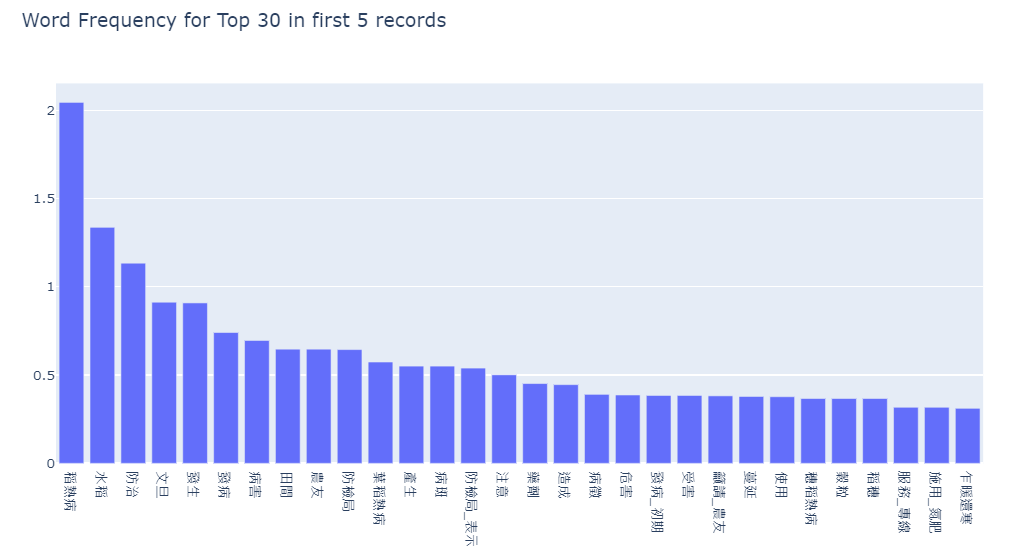

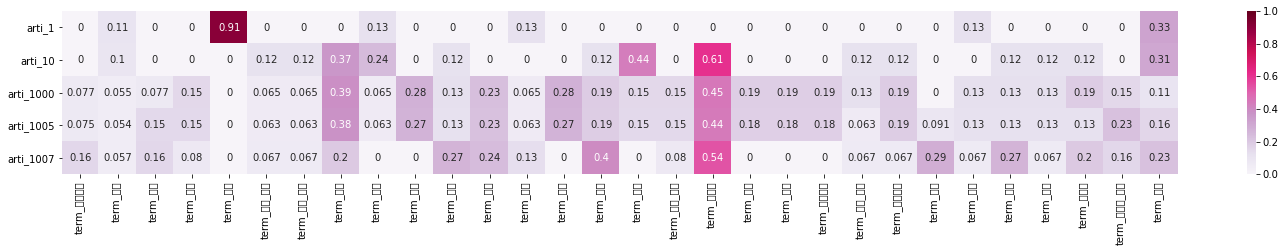

In [16]:
import seaborn as sns

# define the xyz of the heat map
plot_x = ["term_"+ str(i) for i in tfidf_vect.get_feature_names()]   # top 30 words
plot_y = ["arti_"+ str(i) for i in list(df_article.id)]              # first 5 articles/records
plot_z = words_tfidf.toarray()

# draw the heat map
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25, 3))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

## Similarity

### Cosine_Similarity_Unigram

In [32]:
# load package
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
# read article
df_all = pd.read_csv('../../input/stage1_unigram.csv', header = 0, names=["id", "article", "words"])
# df_all = pd.read_csv('../../input/stage2_unigram.csv', header = 0, names=["id", "article", "words"])
# df_all = df_all[0:5]
df_all

,id,article,words
0,1001,稻熱病進入好發季節，防檢局籲請農友加強防範 九十三年四月二十一日動植物防疫檢疫局發布之新聞稿...,"['稻熱病', '進入', '好發_季節', '防檢局', '籲請_農友', '加強_防範'..."
1,1004,全民一起來監測紅火蟻 農委會防檢局表示，自3月份起氣溫逐漸回暖，正是紅火蟻開始活躍的季節，也...,"['全民', '監測', '紅火蟻', '農委會', '防檢局_表示', '月份', '氣溫..."
2,1006,"系統測試公告 有關96年1月29日發布之""蔥、蒜紫斑病及薊馬危害日益嚴重，台南農改場籲請農民...","['系統', '測試', '公告', '96', '29', '發布', '蔥', '蒜',..."
3,1008,二期作水稻生育初期，請注意縱捲葉蟲之防治 縱捲葉蟲原本在水稻第一、二期作之孕穗期至齊穗期為害...,"['二期_作', '水稻_生育', '初期', '請', '注意', '縱捲葉蟲', '防治..."
4,1009,請農友加強水稻瘤野螟及白葉枯病防治 農委會防檢局表示，全國各地二期水稻生長陸續進入孕穗期，依...,"['請_農友', '加強', '水稻_瘤野螟', '白葉枯病', '防治', '農委會', ..."
...,...,...,...
416,991,儘速耕除綠肥作物，慎防斜紋夜蛾密度上升 一、依據新聞報導，在新竹、雲林及嘉義等地區因休耕農田...,"['儘速', '耕除', '綠肥作物', '慎防', '斜紋夜蛾_密度', '上升', '依..."
417,993,請農民在「全國滅鼠週」全力配合田間滅鼠工作 請農民在「全國滅鼠週」全力配合田間滅鼠工作行政院...,"['請', '農民', '全國', '滅鼠', '週', '配合', '田間', '滅鼠',..."
418,994,培育健康秧苗，預防水稻徒長病及立枯病發生 培育健康秧苗，預防水稻徒長病及立枯病發生行政院農業...,"['培育', '健康', '秧苗', '預防', '水稻_徒長病', '立枯病', '發生'..."
419,996,水稻進入分蘗盛期請農友加強防範水稻稻熱病 行政院農業委員會動植物防疫檢疫局表示，自本（九十二...,"['水稻', '進入_分蘗', '盛期', '請_農友', '加強_防範', '水稻', '..."


In [34]:
# read result file
result_all_df = pd.read_csv('../../output/results_similarity_jac_stage1.csv', header = 0)
result_all_df

,Test,Reference,Similarity,Jaccard_Similarity(%)
0,1,10,0.000000,0.058252
1,1,1000,0.000000,0.045267
2,1,1005,0.000000,0.047826
3,1,1007,0.000000,0.040541
4,1,1010,0.142857,0.043668
...,...,...,...,...
313035,998,984,0.000000,0.053488
313036,998,986,0.000000,0.027875
313037,998,988,0.000000,0.024390
313038,998,992,0.333333,0.100000


In [35]:
# compute tf
vectorizer = CountVectorizer() 
text_count_vector = vectorizer.fit_transform(df_all.words)
tf_vector = text_count_vector.toarray()
tf_vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
# compute tf-idf
tfidf_transfomer = TfidfTransformer()
docs_tfidf = tfidf_transfomer.fit_transform(text_count_vector)
tfidf_vector = docs_tfidf.toarray()
tfidf_vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
tf_similarity = cosine_similarity(tf_vector, tf_vector)

# delete the item comparing to itself
tf_similarity = tf_similarity[~np.eye(tf_similarity.shape[0],dtype=bool)].reshape(tf_similarity.shape[0],-1)
tf_similarity.flatten()

array([0.11638252, 0.0433555 , 0.16680568, ..., 0.07541641, 0.16477424,
       0.1356777 ])

In [38]:
tfidf_similarity = cosine_similarity(tfidf_vector, tfidf_vector)

# delete the item comparing to itself
tfidf_similarity = tfidf_similarity[~np.eye(tfidf_similarity.shape[0],dtype=bool)].reshape(tfidf_similarity.shape[0],-1)
tfidf_similarity.flatten()

array([0.04445818, 0.00442437, 0.04627155, ..., 0.02695592, 0.0599465 ,
       0.0563949 ])

In [39]:
result_df = pd.DataFrame({"TF-CosineSimilarity":tf_similarity.flatten(),
                          "TFIDF-CosineSimilarity":tfidf_similarity.flatten()})
result_df

,TF-CosineSimilarity,TFIDF-CosineSimilarity
0,0.116383,0.044458
1,0.043355,0.004424
2,0.166806,0.046272
3,0.287453,0.169351
4,0.156721,0.093073
...,...,...
176815,0.182012,0.055613
176816,0.111370,0.041898
176817,0.075416,0.026956
176818,0.164774,0.059947


In [22]:
combine_result = pd.concat([result_all_df,result_df], axis=1)
combine_result

,Test,Reference,Similarity,Jaccard_Similarity(%),TF-CosineSimilarity,TFIDF-CosineSimilarity
0,1,10,0.000000,0.058252,0.144837,0.056918
1,1,1000,0.000000,0.045267,0.093737,0.028382
2,1,1005,0.000000,0.047826,0.112383,0.032288
3,1,1007,0.000000,0.040541,0.109976,0.030105
4,1,1010,0.142857,0.043668,0.081238,0.019695
...,...,...,...,...,...,...
313035,998,984,0.000000,0.053488,0.224078,0.046496
313036,998,986,0.000000,0.027875,0.127763,0.023124
313037,998,988,0.000000,0.024390,0.177660,0.033177
313038,998,992,0.333333,0.100000,0.158163,0.098255


In [40]:
combine_result.to_csv("../../output/results_similarity_jac_cos_stage1.csv", index= False)
# result_df.to_csv("../../output/results_cos_stage2.csv", index= False)
# combine_result.to_csv("../../output/results_simi_cosSimi_stage2.csv", index= False)

### Cosine_Similarity_Keywords

In [1]:
# load package
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\ctsu\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [17]:
# read result file
# result_template = pd.read_csv('./input_preprocessing_data/result_stage1_template.csv', header = 0)
result_template = pd.read_csv('./input_preprocessing_data/result_stage3_feature_template.csv', header = 0)

result_template = result_template.loc[result_template["Test"] != result_template["Reference"]]
result_template = result_template.reset_index()
del result_template['index']

result_template

,Test,Reference,Similarity
0,100,1002,0.133333
1,100,1003,0.066667
2,100,101,0.133333
3,100,1013,0.000000
4,100,1017,0.000000
5,100,1018,0.400000
6,100,1020,0.000000
7,100,1021,0.000000
8,100,1026,0.000000
9,100,1030,0.000000


Use the data with keywords (with calculating the keywwords' counts).

Use the data after doing loop (with number of krywords) to do tf.

In [19]:
# load tf array
# tf_vector = np.load('./input_preprocessing_data/result_stage1_times.npy')
tf_vector = np.load('./input_preprocessing_data/result_stage3_times.npy')
tf_vector.shape

(420, 764)

In [20]:
tf_similarity = cosine_similarity(tf_vector, tf_vector)

# delete the item comparing to itself
tf_similarity = tf_similarity[~np.eye(tf_similarity.shape[0],dtype=bool)].reshape(tf_similarity.shape[0],-1)
tf_similarity.flatten().shape

C:\Users\ctsu\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


(175980,)

Use the data after doing loop to do tfidf

In [23]:
# Method-1: using count vectorizer and tfidf transformer top 30 features
tfidf_transf = TfidfTransformer()
tfidf_vector = tfidf_transf.fit_transform(tf_vector)
tfidf_vector = tfidf_vector.toarray()
tfidf_vector.shape

(420, 764)

In [24]:
# compute tfidf similarity
tfidf_similarity = cosine_similarity(tfidf_vector, tfidf_vector)

# delete the item comparing to itself
tfidf_similarity = tfidf_similarity[~np.eye(tfidf_similarity.shape[0],dtype=bool)].reshape(tfidf_similarity.shape[0],-1)
tfidf_similarity.flatten().shape

C:\Users\ctsu\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


(175980,)

In [25]:
result_df_multi = pd.DataFrame({"tf_cosine_times":tf_similarity.flatten(),
                                "tfidf_cosine_times":tfidf_similarity.flatten()})
result_df_multi

,tf_cosine_times,tfidf_cosine_times
0,0.123603,0.047808
1,0.099177,0.018642
2,0.364363,0.144300
3,0.000000,0.000000
4,0.000000,0.000000
5,0.554046,0.437591
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000
9,0.000000,0.000000


Use the data with keywords (without calculating the keywwords' counts).

Use the data after doing loop (with number of krywords) to do tf.

In [26]:
# # compute tf
# vectorizer = CountVectorizer() 
# text_count_vector = vectorizer.fit_transform(df_all.words)
# tf_vector = text_count_vector.toarray()
# tf_vector

In [28]:
# load tf array
# tf_vector = np.load('./input_preprocessing_data/result_stage1_appearance.npy')
tf_vector = np.load('./input_preprocessing_data/result_stage3_appearance.npy')
tf_vector.shape

(420, 764)

In [29]:
tf_similarity = cosine_similarity(tf_vector, tf_vector)

# delete the item comparing to itself
tf_similarity = tf_similarity[~np.eye(tf_similarity.shape[0],dtype=bool)].reshape(tf_similarity.shape[0],-1)
tf_similarity.flatten().shape

C:\Users\ctsu\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


(175980,)

Use the data after doing loop to do tfidf

In [32]:
# Method-1: using count vectorizer and tfidf transformer top 30 features
tfidf_transf = TfidfTransformer()
tfidf_vector = tfidf_transf.fit_transform(tf_vector)
tfidf_vector = tfidf_vector.toarray()
tfidf_vector.shape

(420, 764)

In [33]:
# compute similarity
tfidf_similarity = cosine_similarity(tfidf_vector, tfidf_vector)

# delete the item comparing to itself
tfidf_similarity = tfidf_similarity[~np.eye(tfidf_similarity.shape[0],dtype=bool)].reshape(tfidf_similarity.shape[0],-1)
tfidf_similarity.flatten().shape

C:\Users\ctsu\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


(175980,)

In [34]:
result_df_once = pd.DataFrame({"tf_cosine_appearance":tf_similarity.flatten(),
                               "tfidf_cosine_appearance":tfidf_similarity.flatten()})
result_df_once

,tf_cosine_appearance,tfidf_cosine_appearance
0,0.133333,0.038855
1,0.115470,0.019133
2,0.210819,0.106684
3,0.000000,0.000000
4,0.000000,0.000000
5,0.516398,0.419337
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000
9,0.000000,0.000000


Export the concated results.

In [35]:
combine_result = pd.concat([result_template, result_df_once, result_df_multi], axis=1)
# combine_result = pd.concat([result_df_once, result_df_multi], axis=1)
combine_result

,Test,Reference,Similarity,tf_cosine_appearance,tfidf_cosine_appearance,tf_cosine_times,tfidf_cosine_times
0,100,1002,0.133333,0.133333,0.038855,0.123603,0.047808
1,100,1003,0.066667,0.115470,0.019133,0.099177,0.018642
2,100,101,0.133333,0.210819,0.106684,0.364363,0.144300
3,100,1013,0.000000,0.000000,0.000000,0.000000,0.000000
4,100,1017,0.000000,0.000000,0.000000,0.000000,0.000000
5,100,1018,0.400000,0.516398,0.419337,0.554046,0.437591
6,100,1020,0.000000,0.000000,0.000000,0.000000,0.000000
7,100,1021,0.000000,0.000000,0.000000,0.000000,0.000000
8,100,1026,0.000000,0.000000,0.000000,0.000000,0.000000
9,100,1030,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
combine_result.to_csv("./output_preprocessing_data/results_cos_stage3.csv", index= False)

### Use the cosine similarity to extracat the usefel itemset

In [1]:
# load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# read article 3 and 415
df_all = pd.read_csv('../../input/test2.csv', header = 0, names=["id", "article", "words"])
df_article = pd.concat([df_all[df_all["id"] == 3], df_all[df_all["id"] == 415], df_all[df_all["id"] == 689]], ignore_index=True)
df_article

,id,article,words
0,3,夏季為斜紋夜盜及甜菜夜蛾發生盛期，請加強注意，及時防治避免損失。 夏日乾燥炎熱的氣候，正是許...,"['夏季', '斜紋', '夜盜', '甜菜夜蛾', '發生', '盛期', '請', '加..."
1,415,夜蛾拉警報，白粉等著來，臺南區農改場籲請加強防治。臺南區農改場、防檢局及田邊好幫手關心您。 ...,"['夜蛾', '拉', '警報', '白粉', '著來', '臺南_區農_改場_籲請', '..."
2,689,台南區農改場籲請農民注意及時防治斜紋夜盜蟲，提前壓低害蟲密度，以確保作物收成 斜紋夜盜蟲每年...,"['台南_區農', '改場_籲請', '農民_注意', '及時', '防治', '斜紋夜盜蟲..."


In [4]:
tfidf_transfomer = TfidfTransformer()
docs_tfidf = tfidf_transfomer.fit_transform(text_count_vector)
df = pd.DataFrame(docs_tfidf.T.toarray(), index=vectorizer.get_feature_names())


Actual Results
- 3 -> 415
- 689 -> 415

In [7]:
print('============TF + 餘弦相似度============')
# Results
print('文本：3, 415   TF + 餘弦相似度：', cosine_similarity([tf_vector[0]], [tf_vector[1]]))
print('文本：3, 689   TF + 餘弦相似度：', cosine_similarity([tf_vector[0]], [tf_vector[2]]))
print('文本：415, 689 TF + 餘弦相似度：', cosine_similarity([tf_vector[1]], [tf_vector[2]]))
print('文本：689, 415 TF + 餘弦相似度：', cosine_similarity([tf_vector[2]], [tf_vector[1]]))

============TF + 餘弦相似度============
文本：3, 415   TF + 餘弦相似度： [[0.3380617]]
文本：3, 689   TF + 餘弦相似度： [[0.29349018]]
文本：415, 689 TF + 餘弦相似度： [[0.57525848]]
文本：689, 415 TF + 餘弦相似度： [[0.57525848]]


In [8]:
cosine_similarity(tf_vector, tf_vector)

array([[1.        , 0.3380617 , 0.29349018],
       [0.3380617 , 1.        , 0.57525848],
       [0.29349018, 0.57525848, 1.        ]])

In [9]:
print('============TF-IDF + 餘弦相似度============')
# Results
print('文本：3, 415   TF-IDF + 餘弦相似度：', cosine_similarity([df[0]], [df[1]]))
print('文本：3, 689   TF-IDF + 餘弦相似度：', cosine_similarity([df[0]], [df[2]]))
print('文本：415, 689 TF-IDF + 餘弦相似度：', cosine_similarity([df[1]], [df[2]]))
print('文本：689, 415 TF-IDF + 餘弦相似度：', cosine_similarity([df[2]], [df[1]]))

============TF-IDF + 餘弦相似度============
文本：3, 415   TF-IDF + 餘弦相似度： [[0.21108354]]
文本：3, 689   TF-IDF + 餘弦相似度： [[0.17296192]]
文本：415, 689 TF-IDF + 餘弦相似度： [[0.3971169]]
文本：689, 415 TF-IDF + 餘弦相似度： [[0.3971169]]


### Jaccard Similarity - use the whole sentence to calculate the Jaccard Similarity

In [55]:
import pandas as pd 
stage1_unigram = pd.read_csv('stage3_only_keyword.csv', encoding='utf_8_sig') 
stage1_unigram

,Num,Content,Dimension
0,100,發布本(107)年第1期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...,"['三賽唑', '三賽唑可濕性粉劑', '三賽唑可濕性粉', '賽唑可濕性粉劑', '亞賜圃..."
1,1002,敏督利颱風過境，請嚴防農作物疫病蟲害蔓延 九十三年七月九日動植物防疫檢疫局發布之新聞稿行政院...,"['含毒甲基丁香油', '毒甲基丁香油', '甲基丁香油', '丁香油', '水稻', '蔬..."
2,1003,福壽螺防治有撇步，向禁藥-三苯醋錫說不 農委會防檢局表示，台灣各地已陸續進入水稻插秧期，針對...,"['耐克螺', '耐克螺可濕性粉劑', '聚乙醛', '聚乙醛可濕性粉劑', '聚乙醛餌劑'..."
3,101,發布本(107)年度第1期水稻二化螟蟲發生預報，請查照。 本(107)年度三月下旬及四月上旬...,"['培丹', '培丹粒劑', '撲滅松', '撲滅松乳劑', '滅松乳劑', '水稻', '..."
4,1013,斜紋夜蛾進入高峰警戒期 防檢局籲請雲嘉南地區加強防治 號稱行軍蟲的斜紋夜蛾目前已進入發生高...,"['性費洛蒙', '費洛蒙', '蔬菜', '豆類', '雜糧', '綠肥作物', '斜紋夜..."
...,...,...,...
415,982,風災過後請嚴防農作物疫病蟲害侵襲 風災過後請嚴防農作物疫病蟲害侵襲納莉颱風來襲，挾帶連日豪雨...,"['水稻', '青蔥', '蔥', '果樹', '桃', '楊桃', '番石榴', '蔬果類..."
416,983,台南場於9月14日發佈水稻紋枯病、白葉枯病及縱捲葉蟲警報 1.台南區良場於9月14日發佈水稻...,"['水稻', '捲葉蟲', '縱捲葉蟲', '白葉枯病', '紋枯病']"
417,989,共同防治竹筍盲椿象，提高竹筍產量與品質 共同防治竹筍盲椿象，提高竹筍產量與品質為確保竹筍品質...,"['滅賜松', '滅賜松乳劑', '芬化利乳劑', '撲芬松', '撲芬松乳劑', '竹筍'..."
418,99,發布本(106)年第一期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。 依...,"['水稻', '桃', '稻熱病', '葉稻熱病']"


In [56]:
article_index = [str(i) for i in list(stage1_unigram.Num)]
article_index[:10]

['100', '1002', '1003', '101', '1013', '1017', '1018', '1020', '1021', '1026']

In [87]:
# calcuate the similarity, we use the keyword's total numbers - interaction
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    print(intersection)
    union = (len(set(list1)) + len(set(list2))) - intersection
    print(union)
    if union == 0:
        return float(0)
    else:
        return float(intersection) / union

In [75]:
# create the dataframe to record our similarity
result_df = pd.DataFrame({'Test':[], 'Reference': [], 'Similarity(%)': []})
count = 0
similarity_list=[]
for i in a:
    for j in range(len(a)):
        similarity = jaccard_similarity(i, a[j])
        dict = {'Test': article_index[count], 'Reference': article_index[j], 'Similarity(%)': similarity}
        result_df = result_df.append(dict, ignore_index=True)
    count+=1

In [76]:
result_df

,Test,Reference,Similarity(%)
0,100,100,1.0
1,100,1002,1.0
2,1002,100,1.0
3,1002,1002,1.0
4,1003,100,1.0
...,...,...,...
835,989,1002,1.0
836,99,100,1.0
837,99,1002,1.0
838,995,100,1.0


In [62]:
result_df.to_csv('stage3_only_keyword_jaccard_similarity.csv', encoding='utf_8_sig', index=False)

### Jaccard Similarity - only use the keyword to calculate the Jaccard Similarity

In [139]:
import pandas as pd 
stage1_unigram = pd.read_csv('stage1_only_keyword.csv', encoding='utf_8_sig') 
stage1_unigram

,Num,Content,Dimension
0,1,梅雨季來臨，文旦黑點病易發生，請注意病徵，以及早加強防治措施。 5月已進入梅雨季節，近日連續...,"['貝芬硫可濕性粉劑', '硫水懸劑', '硫可濕性粉劑', '鋅錳乃浦', '鋅錳乃浦水懸..."
1,10,天氣多變溫差大，近山區及偏施氮肥田區稻熱病發病較為嚴重，籲請農友注意防治。花蓮區農改場、防檢...,"['亞磷酸', '微生物製劑', '三賽唑', '三賽唑可濕性粉劑', '三賽唑水懸劑', ..."
2,1000,新聞稿-稻熱病進入好發季節，防檢局籲請農友加強防範 行政院農業委員會動植物防疫檢疫局（以下簡...,"['水稻', '稻熱病', '穗稻熱病', '葉稻熱病']"
3,1005,稻熱病進入好發季節，防檢局籲請農友加強防治 農委會防檢局表示，自3月起全國各地水稻生長陸續進...,"['水稻', '稻熱病', '穗稻熱病', '葉稻熱病']"
4,1007,乍暖還寒，防檢局籲請農友加強防治稻熱病 農委會防檢局表示，全國各地水稻生長陸續進入分蘗期，因...,"['水稻', '稻熱病', '葉稻熱病']"
...,...,...,...
555,986,苗栗區農業改良場發佈水稻白葉枯病警報 糧食作物病蟲害發生警報中華民國90年9月21日發佈第3...,"['三賽唑', '三賽唑可濕性粉劑', '三賽唑可濕性粉', '賽唑可濕性粉劑', '撲殺熱..."
556,988,雨後適合稻熱病發生，請持續進行監測並指導農民防治 依據氣象預報，今年自五月中旬起，臺灣地區即...,"['水稻', '梅', '稻熱病']"
557,992,新入侵果實蠅緊急撲滅模擬演習 新聞稿 新入侵植物害蟲緊急撲滅演習產官學總動員嚴防外來疫病蟲...,"['梨', '果樹', '桃', '柑桔', '疫病', '果實蠅', '地中海果實蠅']"
558,997,梨木蝨危害，請農友注意防範 梨木蝨危害，請農友注意防範行政院農業委員會動植物防疫檢疫局(以下...,"['益達胺', '益達胺溶液', '亞滅培', '亞滅培可溶性粉劑', '梨', '梨木蝨'..."


In [140]:
article_index = [str(i) for i in list(stage1_unigram.Num)]
article_index[:10]

['1', '10', '1000', '1005', '1007', '1010', '1011', '1015', '1016', '1023']

In [131]:
# keyword
import numpy as np
len(np.load("result_stage1_times.npy"))

560

In [132]:
vector = np.load("result_stage1_times.npy")

In [141]:
# only keyword
import numpy as np
len(np.load("result_stage1_appearance.npy"))

560

In [142]:
vector = np.load("result_stage1_appearance.npy")

In [143]:
# use the bitwise to detect if they are have the same keyword in the sentence
import collections
def jaccard_similarity(list1, list2):
    intersection = collections.Counter(np.bitwise_and(list1,list2))[1]
    union = collections.Counter(np.bitwise_or(list1,list2))[1]
    if union == 0:
        return float(0)
    else:
        return float(intersection) / union

In [144]:
# create the dataframe to record our similarity
result_df = pd.DataFrame({'Test':[], 'Reference': [], 'Jaccard_Similarity(%)': []})
count = 0
similarity_list=[]
for i in vector:
    for j in range(len(vector)):
        similarity = jaccard_similarity(i, vector[j])
        dict = {'Test': article_index[count], 'Reference': article_index[j], 'Jaccard_Similarity(%)': similarity}
        result_df = result_df.append(dict, ignore_index=True)
    count+=1

In [145]:
result_df

,Test,Reference,Jaccard_Similarity(%)
0,1,1,1.000000
1,1,10,0.000000
2,1,1000,0.000000
3,1,1005,0.000000
4,1,1007,0.000000
...,...,...,...
313595,998,986,0.000000
313596,998,988,0.000000
313597,998,992,0.181818
313598,998,997,0.714286


In [146]:
result_df.to_csv('stage1_only_keyword_jaccard_similarity_yanyu.csv', encoding='utf_8_sig', index=False)

### SimHash Similarity

In [1]:
import pandas as pd
import numpy as np
import collections

In [2]:
# read data
import os
os.getcwd()
os.chdir("C:/Users/owuser/Desktop/2021 Data Mining/Agriculture")
stage1_df = pd.read_csv("stage3_unigram.csv")

In [3]:
# produce a matrix, print the test file num
article_index = [str(i) for i in list(stage1_df.Num)]
article_index

['100',
 '1002',
 '1003',
 '101',
 '1013',
 '1017',
 '1018',
 '1020',
 '1021',
 '1026',
 '1030',
 '1031',
 '1035',
 '1042',
 '1043',
 '1044',
 '1045',
 '1046',
 '1047',
 '1055',
 '1057',
 '1058',
 '1059',
 '106',
 '1065',
 '1069',
 '1071',
 '1077',
 '1078',
 '1079',
 '1083',
 '1090',
 '1096',
 '1099',
 '11',
 '1100',
 '1101',
 '1102',
 '1104',
 '1107',
 '1108',
 '1109',
 '1110',
 '1112',
 '1115',
 '1117',
 '1122',
 '1134',
 '1136',
 '1138',
 '1139',
 '1144',
 '1145',
 '1149',
 '115',
 '1150',
 '1152',
 '1154',
 '1160',
 '1168',
 '1169',
 '1171',
 '1174',
 '1179',
 '118',
 '1181',
 '1183',
 '1184',
 '1189',
 '1192',
 '120',
 '1200',
 '1208',
 '1210',
 '1211',
 '1212',
 '1214',
 '1215',
 '1220',
 '1221',
 '1222',
 '1223',
 '1224',
 '1235',
 '1240',
 '1241',
 '1242',
 '1246',
 '1248',
 '1257',
 '1258',
 '1259',
 '1260',
 '1262',
 '1264',
 '1266',
 '127',
 '1270',
 '1272',
 '1275',
 '1279',
 '1281',
 '1283',
 '1286',
 '1291',
 '1293',
 '1294',
 '1297',
 '1308',
 '1309',
 '1312',
 '1314',
 

In [4]:
stage1_df.Num

0       100
1      1002
2      1003
3       101
4      1013
       ... 
415     982
416     983
417     989
418      99
419     995
Name: Num, Length: 420, dtype: int64

In [5]:
# the package of normalization
import re
# the package of html
import html
# the package of math
import math
# import jieba to process the chinese text
import jieba
import jieba.analyse

class SimHashSimilarity(object):
    """
    SimHash
    """
    def __init__(self, content_x1, content_y2):
        self.s1 = content_x1
        self.s2 = content_y2

    @staticmethod
    def get_bin_str(source):  # transform to binary format
        if source == "":
            return 0
        else:
            t = ord(source[0]) << 7
            m = 1000003
            mask = 2 ** 128 - 1
            for c in source:
                t = ((t * m) ^ ord(c)) & mask
            t ^= len(source)
            if t == -1:
                t = -2
            t = bin(t).replace('0b', '').zfill(64)[-64:]
            return str(t)

    @staticmethod
    def extract_keyword(content):  # extract the keywords
        # filter the label
        re_exp = re.compile(r'(<style>.*?</style>)|(<[^>]+>)', re.S)
        content = re_exp.sub(' ', content)
        content = html.unescape(content)
        # cut
        seg = [i for i in jieba.cut(content, cut_all=True) if i != '']
        # extract the keywords
        keywords = jieba.analyse.extract_tags("|".join(seg), topK=200, withWeight=True)
        return keywords

    def run(self, keywords):
        ret = []
        for keyword, weight in keywords:
            bin_str = self.get_bin_str(keyword)
            key_list = []
            for c in bin_str:
                weight = math.ceil(weight)
                if c == "1":
                    key_list.append(int(weight))
                else:
                    key_list.append(-int(weight))
            ret.append(key_list)
        # dinemsion deduction
        rows = len(ret)
        cols = len(ret[0])
        result = []
        for i in range(cols):
            tmp = 0
            for j in range(rows):
                tmp += int(ret[j][i])
            if tmp > 0:
                tmp = "1"
            elif tmp <= 0:
                tmp = "0"
            result.append(tmp)
        return "".join(result)

    def main(self):

        # extract the keywords
        s1 = self.extract_keyword(self.s1)
        s2 = self.extract_keyword(self.s2)

        sim_hash1 = self.run(s1)
        sim_hash2 = self.run(s2)
        # print(f'Hash similarity 1: {sim_hash1}\n Hash similarity 2: {sim_hash2}')
        length = 0
        for index, char in enumerate(sim_hash1):
            if char == sim_hash2[index]:
                continue
            else:
                length += 1
        return length


In [6]:
# create a df to store the results
result_df = pd.DataFrame({'Test':[], 'Reference': [], 'Similarity(%)': []})
count = 0
similarity_list=[]

for article_veci in range(stage1_df.shape[0]):
    
    com1 = stage1_df.iloc[article_veci][0]
    str1 = stage1_df.loc[stage1_df.Num==com1, "Content"].to_string()
    
    for article_vecj in range(stage1_df.shape[0]):
        com2 = stage1_df.iloc[article_vecj][0]
        str2 = stage1_df.loc[stage1_df.Num==com2, "Content"].to_string()
    
        if __name__ == '__main__':
            content_x = str1
            content_y = str2
            similarity = SimHashSimilarity(content_x, content_y)
            similarity = similarity.main()
            dict = {'Test': stage1_df.iloc[article_veci][0], 'Reference': stage1_df.iloc[article_vecj][0], 'Similarity(%)': similarity}
            result_df = result_df.append(dict, ignore_index=True)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\owuser\AppData\Local\Temp\jieba.cache
Loading model cost 0.558 seconds.
Prefix dict has been built successfully.


In [7]:
result_df.to_csv("Sim_Hash_Results_stage3.csv", index= False)

In [8]:
result_df

,Test,Reference,Similarity(%)
0,100.0,100.0,0.0
1,100.0,1002.0,33.0
2,100.0,1003.0,26.0
3,100.0,101.0,15.0
4,100.0,1013.0,32.0
...,...,...,...
176395,995.0,982.0,26.0
176396,995.0,983.0,33.0
176397,995.0,989.0,22.0
176398,995.0,99.0,22.0


In [9]:
result_df.iloc[421]
list(range(0, 176400, 421))

[0,
 421,
 842,
 1263,
 1684,
 2105,
 2526,
 2947,
 3368,
 3789,
 4210,
 4631,
 5052,
 5473,
 5894,
 6315,
 6736,
 7157,
 7578,
 7999,
 8420,
 8841,
 9262,
 9683,
 10104,
 10525,
 10946,
 11367,
 11788,
 12209,
 12630,
 13051,
 13472,
 13893,
 14314,
 14735,
 15156,
 15577,
 15998,
 16419,
 16840,
 17261,
 17682,
 18103,
 18524,
 18945,
 19366,
 19787,
 20208,
 20629,
 21050,
 21471,
 21892,
 22313,
 22734,
 23155,
 23576,
 23997,
 24418,
 24839,
 25260,
 25681,
 26102,
 26523,
 26944,
 27365,
 27786,
 28207,
 28628,
 29049,
 29470,
 29891,
 30312,
 30733,
 31154,
 31575,
 31996,
 32417,
 32838,
 33259,
 33680,
 34101,
 34522,
 34943,
 35364,
 35785,
 36206,
 36627,
 37048,
 37469,
 37890,
 38311,
 38732,
 39153,
 39574,
 39995,
 40416,
 40837,
 41258,
 41679,
 42100,
 42521,
 42942,
 43363,
 43784,
 44205,
 44626,
 45047,
 45468,
 45889,
 46310,
 46731,
 47152,
 47573,
 47994,
 48415,
 48836,
 49257,
 49678,
 50099,
 50520,
 50941,
 51362,
 51783,
 52204,
 52625,
 53046,
 53467,
 5388

In [11]:
result_df.iloc[421]

Test             1002.0
Reference        1002.0
Similarity(%)       0.0
Name: 421, dtype: float64

In [13]:
filtered_df = result_df

# create the index of df's row -> if test.num = reference.num
self_ref = list(range(0, 176400, 421))

# drop the row if test.num = reference.num
filtered_df = filtered_df.drop(self_ref)

In [14]:
filtered_df.to_csv("Sim_Hash_Results_stage3_Filtered.csv", index=False)

In [100]:
# filter: drop the row if Similarity(%) < 93.36
last_result_df = filtered_df.loc[filtered_df["Similarity(%)"] >= 93.36].reset_index()

# drop the index and Similarity(%) column
del last_result_df['index']
del last_result_df['Similarity(%)']

In [102]:
last_result_df.to_csv("Last Results.csv", index=False)

### MinHash Similarity

In [1]:
import pandas as pd
import numpy as np
import collections

In [2]:
# read data
import os
os.getcwd()
os.chdir("C:/Users/owuser/Desktop/2021 Data Mining/Agriculture")
stage1_df = pd.read_csv("stage3_unigram.csv")

In [3]:
# produce a matrix, print the test file num
article_index = [str(i) for i in list(stage1_df.Num)]
article_index

['100',
 '1002',
 '1003',
 '101',
 '1013',
 '1017',
 '1018',
 '1020',
 '1021',
 '1026',
 '1030',
 '1031',
 '1035',
 '1042',
 '1043',
 '1044',
 '1045',
 '1046',
 '1047',
 '1055',
 '1057',
 '1058',
 '1059',
 '106',
 '1065',
 '1069',
 '1071',
 '1077',
 '1078',
 '1079',
 '1083',
 '1090',
 '1096',
 '1099',
 '11',
 '1100',
 '1101',
 '1102',
 '1104',
 '1107',
 '1108',
 '1109',
 '1110',
 '1112',
 '1115',
 '1117',
 '1122',
 '1134',
 '1136',
 '1138',
 '1139',
 '1144',
 '1145',
 '1149',
 '115',
 '1150',
 '1152',
 '1154',
 '1160',
 '1168',
 '1169',
 '1171',
 '1174',
 '1179',
 '118',
 '1181',
 '1183',
 '1184',
 '1189',
 '1192',
 '120',
 '1200',
 '1208',
 '1210',
 '1211',
 '1212',
 '1214',
 '1215',
 '1220',
 '1221',
 '1222',
 '1223',
 '1224',
 '1235',
 '1240',
 '1241',
 '1242',
 '1246',
 '1248',
 '1257',
 '1258',
 '1259',
 '1260',
 '1262',
 '1264',
 '1266',
 '127',
 '1270',
 '1272',
 '1275',
 '1279',
 '1281',
 '1283',
 '1286',
 '1291',
 '1293',
 '1294',
 '1297',
 '1308',
 '1309',
 '1312',
 '1314',
 

In [4]:
stage1_df.Num

0       100
1      1002
2      1003
3       101
4      1013
       ... 
415     982
416     983
417     989
418      99
419     995
Name: Num, Length: 420, dtype: int64

In [5]:
# the package of normalization
import re
# the package of jieba
import jieba
import jieba.analyse
# the package of html
import html
# import the package of MinHash
from datasketch import MinHash


class MinHashSimilarity(object):
    """
    MinHash
    """
    def __init__(self, content_x1, content_y2):
        self.s1 = content_x1
        self.s2 = content_y2

    @staticmethod
    def extract_keyword(content):  # extract the keywords
        # filter thelabel
        re_exp = re.compile(r'(<style>.*?</style>)|(<[^>]+>)', re.S)
        content = re_exp.sub(' ', content)
        content = html.unescape(content)
        # cut
        seg = [i for i in jieba.cut(content, cut_all=True) if i != '']
        # extract the keywords
        keywords = jieba.analyse.extract_tags("|".join(seg), topK=200, withWeight=False)
        return keywords

    def main(self):

        # calculate MinHash
        m1, m2 = MinHash(), MinHash()
        # extract the keywords
        s1 = self.extract_keyword(self.s1)
        s2 = self.extract_keyword(self.s2)

        for data in s1:
            m1.update(data.encode('utf8'))
        for data in s2:
            m2.update(data.encode('utf8'))

        return m1.jaccard(m2)

In [6]:
# create a df to store the results
result_df = pd.DataFrame({'Test':[], 'Reference': [], 'Similarity(%)': []})
count = 0
similarity_list=[]

for article_veci in range(stage1_df.shape[0]):
    
    com1 = stage1_df.iloc[article_veci][0]
    str1 = stage1_df.loc[stage1_df.Num==com1, "Content"].to_string()
    
    for article_vecj in range(stage1_df.shape[0]):
        com2 = stage1_df.iloc[article_vecj][0]
        str2 = stage1_df.loc[stage1_df.Num==com2, "Content"].to_string()
    
        if __name__ == '__main__':
            content_x = str1
            content_y = str2
            similarity = MinHashSimilarity(content_x, content_y)
            similarity = similarity.main()
            dict = {'Test': stage1_df.iloc[article_veci][0], 'Reference': stage1_df.iloc[article_vecj][0], 'Similarity(%)': similarity}
            result_df = result_df.append(dict, ignore_index=True)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\owuser\AppData\Local\Temp\jieba.cache
Loading model cost 0.705 seconds.
Prefix dict has been built successfully.


In [7]:
result_df.to_csv("Min_Hash_Results_stage3.csv", index= False)

In [8]:
result_df

,Test,Reference,Similarity(%)
0,100.0,100.0,1.000000
1,100.0,1002.0,0.000000
2,100.0,1003.0,0.164062
3,100.0,101.0,0.132812
4,100.0,1013.0,0.000000
...,...,...,...
176395,995.0,982.0,0.000000
176396,995.0,983.0,0.093750
176397,995.0,989.0,0.078125
176398,995.0,99.0,0.078125


In [13]:
result_df.iloc[421]
list(range(0, 176400, 421))

[0,
 421,
 842,
 1263,
 1684,
 2105,
 2526,
 2947,
 3368,
 3789,
 4210,
 4631,
 5052,
 5473,
 5894,
 6315,
 6736,
 7157,
 7578,
 7999,
 8420,
 8841,
 9262,
 9683,
 10104,
 10525,
 10946,
 11367,
 11788,
 12209,
 12630,
 13051,
 13472,
 13893,
 14314,
 14735,
 15156,
 15577,
 15998,
 16419,
 16840,
 17261,
 17682,
 18103,
 18524,
 18945,
 19366,
 19787,
 20208,
 20629,
 21050,
 21471,
 21892,
 22313,
 22734,
 23155,
 23576,
 23997,
 24418,
 24839,
 25260,
 25681,
 26102,
 26523,
 26944,
 27365,
 27786,
 28207,
 28628,
 29049,
 29470,
 29891,
 30312,
 30733,
 31154,
 31575,
 31996,
 32417,
 32838,
 33259,
 33680,
 34101,
 34522,
 34943,
 35364,
 35785,
 36206,
 36627,
 37048,
 37469,
 37890,
 38311,
 38732,
 39153,
 39574,
 39995,
 40416,
 40837,
 41258,
 41679,
 42100,
 42521,
 42942,
 43363,
 43784,
 44205,
 44626,
 45047,
 45468,
 45889,
 46310,
 46731,
 47152,
 47573,
 47994,
 48415,
 48836,
 49257,
 49678,
 50099,
 50520,
 50941,
 51362,
 51783,
 52204,
 52625,
 53046,
 53467,
 5388

In [14]:
result_df.iloc[174715]

Test             982.0
Reference        982.0
Similarity(%)      1.0
Name: 174715, dtype: float64

In [15]:
filtered_df = result_df

# create the index of df's row -> if test.num = reference.num
self_ref = list(range(0, 176400, 421))

# drop the row if test.num = reference.num
filtered_df = filtered_df.drop(self_ref)

In [16]:
filtered_df.to_csv("Min_Hash_Results_stage3_Filtered.csv", index=False)

In [100]:
# filter: drop the row if Similarity(%) < 93.36
last_result_df = filtered_df.loc[filtered_df["Similarity(%)"] >= 93.36].reset_index()

# drop the index and Similarity(%) column
del last_result_df['index']
del last_result_df['Similarity(%)']

In [102]:
last_result_df.to_csv("Last Results.csv", index=False)

## Feature Extraction

In [2]:
# load package
import pandas as pd
import numpy as np

### Read feature data

In [36]:
# read feature data
X1 = np.load('../input/model feed/features3/X1_new_appearance.npy')
X2 = np.load('../input/model feed/features3/X2_new_appearance.npy')

In [37]:
# read feature data
X1_times = np.load('../input/model feed/features3/X1_new_times.npy')
X2_times = np.load('../input/model feed/features3/X2_new_times.npy')

### Stage 1

In [38]:
X1.shape

(311922, 1537)

In [39]:
similarity_stage1_feature = X1[:,0:9]
similarity_stage1_feature.shape

(311922, 9)

In [40]:
appearance_stage1_feature = X1[:,9:]
appearance_stage1_feature.shape

(311922, 1528)

In [41]:
times_stage1_feature = X1_times[:,9:]
times_stage1_feature.shape

(311922, 1528)

In [42]:
np.save('similarity_stage1_feature.npy', similarity_stage1_feature)
np.save('appearance_stage1_feature.npy', appearance_stage1_feature)
np.save('times_stage1_feature.npy', times_stage1_feature)

### Stage 2

In [43]:
X2.shape

(176820, 1537)

In [44]:
similarity_stage2_feature = X2[:,0:9]
similarity_stage2_feature.shape

(176820, 9)

In [45]:
appearance_stage2_feature = X2[:,9:]
appearance_stage2_feature.shape

(176820, 1528)

In [46]:
times_stage2_feature = X2_times[:,9:]
times_stage2_feature.shape

(176820, 1528)

In [47]:
np.save('similarity_stage2_feature.npy', similarity_stage2_feature)
np.save('appearance_stage2_feature.npy', appearance_stage2_feature)
np.save('times_stage2_feature.npy', times_stage2_feature)

---
### temp use

In [5]:
result_template = pd.read_csv('../input/TestStage3_AU.csv', header = 0)

result_template = result_template.loc[result_template["Test"] != result_template["Reference"]]
result_template = result_template.reset_index()
del result_template['index']

result_template

,Test,Reference,Similarity
0,100,1002,0.133333
1,100,1003,0.066667
2,100,101,0.133333
3,100,1013,0.000000
4,100,1017,0.000000
...,...,...,...
175975,995,981,0.142857
175976,995,982,0.285714
175977,995,983,0.142857
175978,995,989,0.000000


In [7]:
# np.save('similarity_stage2_feature.npy', similarity_stage2_feature)
result_template.to_csv("../output/result_stage3_template.csv", index=False)

### stage1 feature merging

In [2]:
# read in features for stage1 (au score)
au_df = pd.read_csv("TrainStage1_AU.csv")
## filter self-reference
au_df = au_df.loc[au_df['Test'] != au_df['Reference']]
## filter 887 ugly article
au_df = au_df.loc[au_df['Test'] != 887]
au_df = au_df.loc[au_df['Reference'] != 887]
au_df

,Test,Reference,Similarity
1,1,10,0.000000
2,1,1000,0.000000
3,1,1005,0.000000
4,1,1007,0.000000
5,1,1010,0.142857
...,...,...,...
313594,998,984,0.000000
313595,998,986,0.000000
313596,998,988,0.000000
313597,998,992,0.333333


In [3]:
# read in features for stage1 (jaccard)
jcd_df1 = pd.read_csv("new_data/stage1_keyword_jaccard_similarity_yanyu.csv")
jcd_df2 = pd.read_csv("new_data/stage1_only_keyword_jaccard_similarity_yanyu.csv")
jcd_df = pd.merge(jcd_df1, jcd_df2, on=["Test", "Reference"], how="left")
# rename columns
jcd_df = jcd_df.rename(
    {'Jaccard_Similarity(%)_x': 'jaccard_once_keyword', 'Jaccard_Similarity(%)_y': 'jaccard_multi_keyword'},
    axis=1
)
jcd_df

,Test,Reference,jaccard_once_keyword,jaccard_multi_keyword
0,1,1,1.0,1.000000
1,1,10,0.0,0.000000
2,1,1000,0.0,0.000000
3,1,1005,0.0,0.000000
4,1,1007,0.0,0.000000
...,...,...,...,...
313595,998,986,0.0,0.000000
313596,998,988,0.0,0.000000
313597,998,992,1.0,0.181818
313598,998,997,0.0,0.714286


In [4]:
# read in features for stage1 (cosine similarities)
cos_df = pd.read_csv("new_data/results_cos_stage1.csv")
cos_df

,Test,Reference,tf_cosine_appearance,tfidf_cosine_appearance,tf_cosine_times,tfidf_cosine_times
0,1,10,0.000000,0.000000,0.000000,0.000000
1,1,1000,0.000000,0.000000,0.000000,0.000000
2,1,1005,0.000000,0.000000,0.000000,0.000000
3,1,1007,0.000000,0.000000,0.000000,0.000000
4,1,1010,0.188982,0.184381,0.158624,0.195430
...,...,...,...,...,...,...
313035,998,984,0.000000,0.000000,0.000000,0.000000
313036,998,986,0.000000,0.000000,0.000000,0.000000
313037,998,988,0.000000,0.000000,0.000000,0.000000
313038,998,992,0.308607,0.238700,0.099049,0.077671


In [5]:
# read in features for stage1 (heimin)
hemin_df = pd.read_csv("new_data/Sim_Hash_Results_stage1_Filtered.csv")
hemin_df

,Test,Reference,Sim_Hash_Similarity
0,1,10,0.30
1,1,1000,0.32
2,1,1005,0.27
3,1,1007,0.33
4,1,1010,0.20
...,...,...,...
311917,998,984,0.16
311918,998,986,0.25
311919,998,988,0.22
311920,998,992,0.26


In [6]:
# read in features for stage1 (heimin)
min_hemin_df = pd.read_csv("new_data/Min_Hash_Results_stage1_Filtered.csv")
min_hemin_df

,Test,Reference,Min_Similarity
0,1,10,0.109375
1,1,1000,0.000000
2,1,1005,0.046875
3,1,1007,0.046875
4,1,1010,0.109375
...,...,...,...
311917,998,984,0.085938
311918,998,986,0.000000
311919,998,988,0.031250
311920,998,992,0.062500


### merge all together
- **order**: similarity(au_score), jaccard_once, jaccard_multi, tf_cosine_once_keyword, tfidf_cosine_once_keyword, tf_cosine_multi_keyword, tfidf_cosine_multi_keyword, sim_hash

In [7]:
# merge all together
features1_df = pd.merge(au_df, jcd_df, on=["Test", "Reference"], how="left")
features1_df = pd.merge(features1_df, cos_df, on=["Test", "Reference"], how="left")
features1_df = pd.merge(features1_df, hemin_df, on=["Test", "Reference"], how="left")
features1_df = pd.merge(features1_df, min_hemin_df, on=["Test", "Reference"], how="left")
features1_df

,Test,Reference,Similarity,jaccard_once_keyword,jaccard_multi_keyword,tf_cosine_appearance,tfidf_cosine_appearance,tf_cosine_times,tfidf_cosine_times,Sim_Hash_Similarity,Min_Similarity
0,1,10,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.30,0.109375
1,1,1000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.32,0.000000
2,1,1005,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.27,0.046875
3,1,1007,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.33,0.046875
4,1,1010,0.142857,0.0,0.100000,0.188982,0.184381,0.158624,0.195430,0.20,0.109375
...,...,...,...,...,...,...,...,...,...,...,...
311917,998,984,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.16,0.085938
311918,998,986,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000
311919,998,988,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.22,0.031250
311920,998,992,0.333333,1.0,0.181818,0.308607,0.238700,0.099049,0.077671,0.26,0.062500


In [43]:
# output only appearance
stage1_app_df = features1_df[["Similarity", "jaccard_once_keyword",
              "tf_cosine_appearance", "tfidf_cosine_appearance",
              "Sim_Hash_Similarity", "Min_Similarity"]]
stage1_app_np = stage1_app_df.to_numpy()
with open("stage1_similarity_of_only_appearance.npy", "wb") as f:
    np.save(f, stage1_app_np)

In [46]:
len(stage1_app_np[0])

6

In [47]:
# output only times
stage1_times_df = features1_df[["Similarity", "jaccard_multi_keyword",
              "tf_cosine_times", "tfidf_cosine_times",
              "Sim_Hash_Similarity", "Min_Similarity"]]
stage1_times_np = stage1_times_df.to_numpy()
with open("stage1_similarity_of_only_times.npy", "wb") as f:
    np.save(f, stage1_times_np)

In [49]:
len(stage1_times_np[0])

6

In [68]:
# output all
all_df = features1_df[['Similarity', 'jaccard_once_keyword',
       'jaccard_multi_keyword', 'tf_cosine_appearance',
       'tfidf_cosine_appearance', 'tf_cosine_times', 'tfidf_cosine_times',
       'Sim_Hash_Similarity', 'Min_Similarity']]
all_np = all_df.to_numpy()
with open("stage1_similarity_feature.npy", "wb") as f:
    np.save(f, all_np)

In [92]:
len(all_np[0])

9

In [8]:
# output all to a csv include test, reference
features1_df.to_csv("stage1_similarity_features.csv", index=False)

In [41]:
# add answer column
ans_df = pd.read_csv("TrainLabel_AU.csv")
ans_df["Relevance"] = 1
stage1_df = pd.merge(features1_df, ans_df[["Test", "Reference", "Relevance"]], how="left", on=["Test","Reference"])
stage1_df["Relevance"] = stage1_df["Relevance"].fillna(0)
stage1_df

,Test,Reference,Similarity,jaccard_once_keyword,jaccard_multi_keyword,tf_cosine_once_keyword,tfidf_cosine_once_keyword,tf_cosine_multi_keyword,tfidf_cosine_multi_keyword,Sim_Hash_Similarity,Relevance
0,1,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.30,0.0
1,1,1000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.32,0.0
2,1,1005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.27,0.0
3,1,1007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.33,0.0
4,1,1010,0.142857,0.071429,0.071429,0.188982,0.000000,0.158624,0.000000,0.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...
311917,998,984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.16,0.0
311918,998,986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.0
311919,998,988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.22,0.0
311920,998,992,0.333333,0.142857,0.142857,0.308607,0.096121,0.099049,0.024938,0.26,0.0


In [43]:
# store compare csv
stage1_comp_df = stage1_df[["Test", "Reference", "Similarity", "Relevance"]]
#stage1_comp_df.to_csv("Stage1CompareAns.csv", index=False)
stage1_comp_df

,Test,Reference,Similarity,Relevance
0,1,10,0.000000,0.0
1,1,1000,0.000000,0.0
2,1,1005,0.000000,0.0
3,1,1007,0.000000,0.0
4,1,1010,0.142857,0.0
...,...,...,...,...
311917,998,984,0.000000,0.0
311918,998,986,0.000000,0.0
311919,998,988,0.000000,0.0
311920,998,992,0.333333,0.0


In [44]:
# extract features
extracted_df = stage1_df.copy()
del extracted_df['Test']
del extracted_df['Reference']
del extracted_df['Relevance']
X1 = extracted_df.to_numpy()
X1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.3       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.32      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.27      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.22      ],
       [0.33333333, 0.14285714, 0.14285714, ..., 0.09904924, 0.02493781,
        0.26      ],
       [0.83333333, 0.7       , 0.7       , ..., 0.93274356, 0.98369463,
        0.18      ]])

In [46]:
# output features
with open("X1_only_similarities.npy", "wb") as f:
    np.save(f, X1)

In [48]:
# output answers
Y1 = stage1_comp_df.Relevance.values
with open("Y1_only_similarities.npy", "wb") as f:
    np.save(f, Y1)

### stage3 feature merging

In [9]:
# read in features for stage1 (au score)
au2_df = pd.read_csv("TestStage3_AU.csv")
## filter self-reference
au2_df = au2_df.loc[au2_df['Test'] != au2_df['Reference']]
## filter 887 ugly article
au2_df = au2_df.loc[au2_df['Test'] != 887]
au2_df = au2_df.loc[au2_df['Reference'] != 887]
au2_df

,Test,Reference,Similarity
0,100,1002,0.133333
1,100,1003,0.066667
2,100,101,0.133333
3,100,1013,0.000000
4,100,1017,0.000000
...,...,...,...
175975,995,981,0.142857
175976,995,982,0.285714
175977,995,983,0.142857
175978,995,989,0.000000


In [10]:
# read in features for stage1 (jaccard)
jcd2_df1 = pd.read_csv("new_data/stage3_keyword_jaccard_similarity_yanyu.csv")
jcd2_df2 = pd.read_csv("new_data/stage3_only_keyword_jaccard_similarity_yanyu.csv")
jcd2_df = pd.merge(jcd2_df1, jcd2_df2, on=["Test", "Reference"], how="left")
# rename columns
jcd2_df = jcd2_df.rename(
    {'Jaccard_Similarity(%)_x': 'jaccard_once_keyword', 'Jaccard_Similarity(%)_y': 'jaccard_multi_keyword'},
    axis=1
)
jcd2_df

,Test,Reference,jaccard_once_keyword,jaccard_multi_keyword
0,100,100,1.0,1.000000
1,100,1002,0.1,0.071429
2,100,1003,0.0,0.052632
3,100,101,1.0,0.105263
4,100,1013,0.0,0.000000
...,...,...,...,...
176395,995,982,0.1,0.100000
176396,995,983,0.0,0.100000
176397,995,989,0.0,0.000000
176398,995,99,0.5,0.222222


In [11]:
# read in features for stage1 (cosine similarities)
cos2_df = pd.read_csv("new_data/results_cos_stage3.csv")
cos2_df

,Test,Reference,Similarity,tf_cosine_appearance,tfidf_cosine_appearance,tf_cosine_times,tfidf_cosine_times
0,100,1002,0.133333,0.133333,0.038855,0.123603,0.047808
1,100,1003,0.066667,0.115470,0.019133,0.099177,0.018642
2,100,101,0.133333,0.210819,0.106684,0.364363,0.144300
3,100,1013,0.000000,0.000000,0.000000,0.000000,0.000000
4,100,1017,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
175975,995,981,0.142857,0.094491,0.022252,0.552917,0.210549
175976,995,982,0.285714,0.195180,0.100620,0.222871,0.072412
175977,995,983,0.142857,0.188982,0.055576,0.386444,0.129999
175978,995,989,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
# read in features for stage1 (heimin)
hemin2_df = pd.read_csv("new_data/Sim_Hash_Results_stage3_Filtered.csv")
hemin2_df['Sim_Hash_Similarity'] = hemin2_df['Sim_Hash_Similarity']/100
hemin2_df

,Test,Reference,Sim_Hash_Similarity
0,100,1002,0.33
1,100,1003,0.26
2,100,101,0.15
3,100,1013,0.32
4,100,1017,0.35
...,...,...,...
175975,995,981,0.14
175976,995,982,0.26
175977,995,983,0.33
175978,995,989,0.22


In [13]:
# read in features for stage1 (min heimin)
min_hemin2_df = pd.read_csv("new_data/Min_Hash_Results_stage3_Filtered.csv")
min_hemin2_df

,Test,Reference,Min_Similarity
0,100,1002,0.000000
1,100,1003,0.164062
2,100,101,0.132812
3,100,1013,0.000000
4,100,1017,0.000000
...,...,...,...
175975,995,981,0.445312
175976,995,982,0.000000
175977,995,983,0.093750
175978,995,989,0.078125


### merge all together
- **order**: similarity(au_score), jaccard_once, jaccard_multi, tf_cosine_once_keyword, tfidf_cosine_once_keyword, tf_cosine_multi_keyword, tfidf_cosine_multi_keyword, sim_hash

In [14]:
# merge all together
features2_df = pd.merge(au2_df, jcd2_df, on=["Test", "Reference"], how="left")
features2_df = pd.merge(features2_df, cos2_df, on=["Test", "Reference", "Similarity"], how="left")
features2_df = pd.merge(features2_df, hemin2_df, on=["Test", "Reference"], how="left")
features2_df = pd.merge(features2_df, min_hemin2_df, on=["Test", "Reference"], how="left")
features2_df

,Test,Reference,Similarity,jaccard_once_keyword,jaccard_multi_keyword,tf_cosine_appearance,tfidf_cosine_appearance,tf_cosine_times,tfidf_cosine_times,Sim_Hash_Similarity,Min_Similarity
0,100,1002,0.133333,0.1,0.071429,0.133333,0.038855,0.123603,0.047808,0.33,0.000000
1,100,1003,0.066667,0.0,0.052632,0.115470,0.019133,0.099177,0.018642,0.26,0.164062
2,100,101,0.133333,1.0,0.105263,0.210819,0.106684,0.364363,0.144300,0.15,0.132812
3,100,1013,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.32,0.000000
4,100,1017,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.35,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
175975,995,981,0.142857,0.0,0.045455,0.094491,0.022252,0.552917,0.210549,0.14,0.445312
175976,995,982,0.285714,0.1,0.100000,0.195180,0.100620,0.222871,0.072412,0.26,0.000000
175977,995,983,0.142857,0.0,0.100000,0.188982,0.055576,0.386444,0.129999,0.33,0.093750
175978,995,989,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.22,0.078125


In [61]:
# output only appearance
stage2_app_df = features2_df[["Similarity", "jaccard_once_keyword",
              "tf_cosine_appearance", "tfidf_cosine_appearance",
              "Sim_Hash_Similarity", "Min_Similarity"]]
stage2_app_np = stage2_app_df.to_numpy()
with open("stage3_similarity_of_only_appearance.npy", "wb") as f:
    np.save(f, stage2_app_np)

In [96]:
len(stage2_app_np)

175980

In [63]:
# output only times
stage2_times_df = features2_df[["Similarity", "jaccard_multi_keyword",
              "tf_cosine_times", "tfidf_cosine_times",
              "Sim_Hash_Similarity", "Min_Similarity"]]
stage2_times_np = stage2_times_df.to_numpy()
with open("stage3_similarity_of_only_times.npy", "wb") as f:
    np.save(f, stage2_times_np)

In [93]:
len(stage2_times_np[0])

6

In [65]:
features2_df.columns.values

array(['Test', 'Reference', 'Similarity', 'jaccard_once_keyword',
       'jaccard_multi_keyword', 'tf_cosine_appearance',
       'tfidf_cosine_appearance', 'tf_cosine_times', 'tfidf_cosine_times',
       'Sim_Hash_Similarity', 'Min_Similarity'], dtype=object)

In [66]:
# output all
all3_df = features2_df[['Similarity', 'jaccard_once_keyword',
       'jaccard_multi_keyword', 'tf_cosine_appearance',
       'tfidf_cosine_appearance', 'tf_cosine_times', 'tfidf_cosine_times',
       'Sim_Hash_Similarity', 'Min_Similarity']]
all3_np = all3_df.to_numpy()
with open("stage3_similarity_feature.npy", "wb") as f:
    np.save(f, all3_np)

In [95]:
len(all3_np[0])

9

In [15]:
# output all to a csv include test, reference
features2_df.to_csv("stage3_similarity_features.csv", index=False)

In [ ]:
# output only appearance
stage1_app_df = features1_df[["Similarity", "jaccard_once_keyword",
              "tf_cosine_appearance", "tfidf_cosine_appearance",
              "Sim_Hash_Similarity", "Min_Similarity"]]
stage1_app_np = stage1_app_df.to_numpy()
with open("stage1_similarity_of_only_appearance.npy", "wb") as f:
    np.save(f, stage1_app_np)

len(stage1_app_np[0])

# output only times
stage1_times_df = features1_df[["Similarity", "jaccard_multi_keyword",
              "tf_cosine_times", "tfidf_cosine_times",
              "Sim_Hash_Similarity", "Min_Similarity"]]
stage1_times_np = stage1_times_df.to_numpy()
with open("stage1_similarity_of_only_times.npy", "wb") as f:
    np.save(f, stage1_times_np)

len(stage1_times_np[0])

In [57]:
# store compare csv
stage2_df = features2_df
stage2_comp_df = stage2_df[["Test", "Reference", "Similarity"]]
#stage2_comp_df.to_csv("Stage2CompareAns.csv", index=False)
stage2_comp_df

,Test,Reference,Similarity
0,1001,1004,0.00
1,1001,1006,0.00
2,1001,1008,0.25
3,1001,1009,0.25
4,1001,1012,0.00
...,...,...,...
176815,999,990,0.00
176816,999,991,0.00
176817,999,993,0.00
176818,999,994,0.00


In [81]:
# extract features
extracted2_df = stage2_df.copy()
del extracted2_df['Test']
del extracted2_df['Reference']
X2 = extracted2_df.to_numpy()
X2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.3       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.31      ],
       [0.25      , 0.09090909, 0.09090909, ..., 0.1790513 , 0.10848065,
        0.27      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.31      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.21      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.3       ]])

In [82]:
# output features
with open("X2_only_similarities.npy", "wb") as f:
    np.save(f, X2)

### Add on article tf-vectors (both appearance and times)

### stage 1

In [72]:
appearance_vects = np.load("../Labeling/result_train_appearance.npy")
times_vects = np.load("../Labeling/result_train_times.npy")
train_vects = np.concatenate((appearance_vects, times_vects), axis=1)
train_vects

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [73]:
# check the length to see concatenate works or not
len(train_vects[0])

1528

In [74]:
# delete data 887
train_vects = np.delete(train_vects, 514, 0)

In [75]:
# read in article_index
article_index = pd.read_csv("stage1.csv").Num
article_index = article_index[article_index != 887]
article_index = article_index.reset_index()
del article_index['index']
article_index

,Num
0,1
1,10
2,1000
3,1005
4,1007
...,...
554,986
555,988
556,992
557,997


In [76]:
# transfer to pd dataframe & add test labels on
train_vect_df = pd.DataFrame(train_vects)
train_vect_df = train_vect_df.reset_index()
del train_vect_df['index']
train_vect_df['Test'] = article_index
train_vect_df

,0,1,2,3,4,5,6,7,8,9,...,1519,1520,1521,1522,1523,1524,1525,1526,1527,Test
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,10
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1005
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,986
555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,988
556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,992
557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,997


In [77]:
# ref df
ref_vect_df = train_vect_df.copy()
train_vect_df['key'] = 0
ref_vect_df['key'] = 0
stage1_vector_df = train_vect_df.merge(ref_vect_df, on="key", how="outer")
del stage1_vector_df['key']
stage1_vector_df = stage1_vector_df.rename({"Test_x": "Test", "Test_y": "Reference"}, axis=1)
# remove self-reference
stage1_vector_df = stage1_vector_df.loc[stage1_vector_df['Test'] != stage1_vector_df['Reference']]
stage1_vector_df

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,1519_y,1520_y,1521_y,1522_y,1523_y,1524_y,1525_y,1526_y,1527_y,Reference
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1005
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1007
5,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,984
312476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,986
312477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,988
312478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,992


In [ ]:
stage1_vector_df

In [30]:
# join similarity features with article vectors
all_feat_df = pd.merge(features1_df, stage1_vector_df, on=["Test", "Reference"], how="inner")
all_feat_df

,Test,Reference,Similarity,jaccard_once_keyword,jaccard_multi_keyword,tf_cosine_once_keyword,tfidf_cosine_once_keyword,tf_cosine_multi_keyword,tfidf_cosine_multi_keyword,Sim_Hash_Similarity,...,1518_y,1519_y,1520_y,1521_y,1522_y,1523_y,1524_y,1525_y,1526_y,1527_y
0,1,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.30,...,0,0,0,0,0,0,0,0,0,0
1,1,1000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.32,...,0,0,0,0,0,0,0,0,0,0
2,1,1005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.27,...,0,0,0,0,0,0,0,0,0,0
3,1,1007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.33,...,0,0,0,0,0,0,0,0,0,0
4,1,1010,0.142857,0.071429,0.071429,0.188982,0.000000,0.158624,0.000000,0.20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311917,998,984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.16,...,0,0,0,0,0,0,0,0,0,0
311918,998,986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,...,0,0,0,0,0,0,0,0,0,0
311919,998,988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.22,...,0,0,0,0,0,0,0,0,0,0
311920,998,992,0.333333,0.142857,0.142857,0.308607,0.096121,0.099049,0.024938,0.26,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# change to numpy array
del all_feat_df["Test"]
del all_feat_df["Reference"]
stage1_all_arr = all_feat_df.to_numpy()
stage1_all_arr

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.14285714, 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       [0.83333333, 0.7       , 0.7       , ..., 0.        , 0.        ,
        0.        ]])

In [71]:
stage1_all_arr

NameError: name 'stage1_all_arr' is not defined

In [32]:
# output to file
X1 = stage1_all_arr
with open("X1_appearance_times.npy", "wb") as f:
    np.save(f, X1)

In [33]:
len(X1)

311922

### stage2

In [34]:
appearance2_vects = np.load("../Labeling/result_test_appearance.npy")
times2_vects = np.load("../Labeling/result_test_times.npy")
test_vects = np.concatenate((appearance2_vects, times2_vects), axis=1)
test_vects

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
# check the length to see concatenate works or not
len(test_vects[0])

1528

In [36]:
# read in article_index
article2_index = pd.read_csv("stage2.csv").Num
article2_index

0      1001
1      1004
2      1006
3      1008
4      1009
       ... 
416     991
417     993
418     994
419     996
420     999
Name: Num, Length: 421, dtype: int64

In [37]:
# transfer to pd dataframe & add test labels on
test_vect_df = pd.DataFrame(test_vects)
test_vect_df = test_vect_df.reset_index()
del test_vect_df['index']
test_vect_df['Test'] = article2_index
test_vect_df

,0,1,2,3,4,5,6,7,8,9,...,1519,1520,1521,1522,1523,1524,1525,1526,1527,Test
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1001
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1004
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1006
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1008
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,991
417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,993
418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,994
419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,996


In [38]:
# ref df
ref_vect2_df = test_vect_df.copy()
test_vect_df['key'] = 0
ref_vect2_df['key'] = 0
stage2_vector_df = test_vect_df.merge(ref_vect2_df, on="key", how="outer")
del stage2_vector_df['key']
stage2_vector_df = stage2_vector_df.rename({"Test_x": "Test", "Test_y": "Reference"}, axis=1)
# remove self-reference
stage2_vector_df = stage2_vector_df.loc[stage2_vector_df['Test'] != stage2_vector_df['Reference']]
stage2_vector_df

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,1519_y,1520_y,1521_y,1522_y,1523_y,1524_y,1525_y,1526_y,1527_y,Reference
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1004
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1006
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1008
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1009
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,990
177236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,991
177237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,993
177238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,994


In [39]:
# join similarity features with article vectors
all_feat2_df = pd.merge(features2_df, stage2_vector_df, on=["Test", "Reference"], how="inner")
all_feat2_df

,Test,Reference,Similarity,jaccard_once_keyword,jaccard_multi_keyword,tf_cosine_once_keyword,tfidf_cosine_once_keyword,tf_cosine_multi_keyword,tfidf_cosine_multi_keyword,Sim_Hash_Similarity,...,1518_y,1519_y,1520_y,1521_y,1522_y,1523_y,1524_y,1525_y,1526_y,1527_y
0,1001,1004,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.30,...,0,0,0,0,0,0,0,0,0,0
1,1001,1006,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.31,...,0,0,0,0,0,0,0,0,0,0
2,1001,1008,0.25,0.090909,0.090909,0.250000,0.061200,0.179051,0.108481,0.27,...,0,0,0,0,0,0,0,0,0,0
3,1001,1009,0.25,0.166667,0.166667,0.288675,0.119242,0.231800,0.106533,0.27,...,0,0,0,0,0,0,0,0,0,0
4,1001,1012,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.29,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176815,999,990,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.34,...,0,0,0,0,0,0,0,0,0,0
176816,999,991,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.34,...,0,0,0,0,0,0,0,0,0,0
176817,999,993,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.31,...,0,0,0,0,0,0,0,0,0,0
176818,999,994,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.21,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# change to numpy array
del all_feat2_df["Test"]
del all_feat2_df["Reference"]
stage2_all_arr = all_feat2_df.to_numpy()
stage2_all_arr

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.09090909, 0.09090909, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
# output to file
X2 = stage2_all_arr
with open("X2_appearance_times.npy", "wb") as f:
    np.save(f, X2)

### Only appearance

### stage 1

In [18]:
train_vects = np.load("../Labeling/result_train_times.npy")
train_vects

array([[1, 2, 4, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
# delete data 887
train_vects = np.delete(train_vects, 514, 0)

In [20]:
# read in article_index
article_index = pd.read_csv("stage1.csv").Num
article_index = article_index[article_index != 887]
article_index = article_index.reset_index()
del article_index['index']
article_index

,Num
0,1
1,10
2,1000
3,1005
4,1007
...,...
554,986
555,988
556,992
557,997


In [21]:
# transfer to pd dataframe & add test labels on
train_vect_df = pd.DataFrame(train_vects)
train_vect_df = train_vect_df.reset_index()
del train_vect_df['index']
train_vect_df['Test'] = article_index
train_vect_df

,0,1,2,3,4,5,6,7,8,9,...,755,756,757,758,759,760,761,762,763,Test
0,1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,10
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1005
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,986
555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,988
556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,992
557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,997


In [22]:
# ref df
ref_vect_df = train_vect_df.copy()
train_vect_df['key'] = 0
ref_vect_df['key'] = 0
stage1_vector_df = train_vect_df.merge(ref_vect_df, on="key", how="outer")
del stage1_vector_df['key']
stage1_vector_df = stage1_vector_df.rename({"Test_x": "Test", "Test_y": "Reference"}, axis=1)
# remove self-reference
stage1_vector_df = stage1_vector_df.loc[stage1_vector_df['Test'] != stage1_vector_df['Reference']]
stage1_vector_df

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,755_y,756_y,757_y,758_y,759_y,760_y,761_y,762_y,763_y,Reference
1,1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000
3,1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1005
4,1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1007
5,1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,984
312476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,986
312477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,988
312478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,992


In [23]:
# output the order_df
order_df = stage1_vector_df[["Test", "Reference"]]
order_df.to_csv("stage1_order.csv", index=False)

In [24]:
# delete test & reference  and save the article vectors into numpy
del order_df["Test"]
del order_df["Reference"]
stage1_vector_np = stage1_vector_df.to_numpy()
with open("stage1_times_feature.npy", "wb") as f:
    np.save(f, stage1_vector_np)

### stage 3

In [26]:
stage3_vects = np.load("../Labeling/result_stage3_times.npy")
stage3_vects

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
# read in article_index
article_index = pd.read_csv("../Labeling/stage3_keyword.csv").Num
article_index

0       100
1      1002
2      1003
3       101
4      1013
       ... 
415     982
416     983
417     989
418      99
419     995
Name: Num, Length: 420, dtype: int64

In [28]:
# transfer to pd dataframe & add test labels on
stage3_vect_df = pd.DataFrame(stage3_vects)
stage3_vect_df['Test'] = article_index
stage3_vect_df

,0,1,2,3,4,5,6,7,8,9,...,755,756,757,758,759,760,761,762,763,Test
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1002
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1003
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,101
4,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,982
416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,983
417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,989
418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,99


In [29]:
# ref df
ref3_vect_df = stage3_vect_df.copy()
stage3_vect_df['key'] = 0
ref3_vect_df['key'] = 0
stage3_vector_df = stage3_vect_df.merge(ref3_vect_df, on="key", how="outer")
del stage3_vector_df['key']
stage3_vector_df = stage3_vector_df.rename({"Test_x": "Test", "Test_y": "Reference"}, axis=1)
# remove self-reference
stage3_vector_df = stage3_vector_df.loc[stage3_vector_df['Test'] != stage3_vector_df['Reference']]
stage3_vector_df

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,755_y,756_y,757_y,758_y,759_y,760_y,761_y,762_y,763_y,Reference
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1002
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1003
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,101
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1013
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,981
176395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,982
176396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,983
176397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,989


In [30]:
# output the order_df
order3_df = stage3_vector_df[["Test", "Reference"]]
order3_df.to_csv("stage3_order.csv", index=False)

In [31]:
# delete test & reference  and save the article vectors into numpy
del order3_df["Test"]
del order3_df["Reference"]
stage3_vector_np = stage3_vector_df.to_numpy()
with open("stage3_times_feature.npy", "wb") as f:
    np.save(f, stage3_vector_np)

In [88]:
gan = np.load("stage1_times_feature.npy")

In [89]:
gan[:, 1529:1530]

array([[  10],
       [1000],
       [1005],
       ...,
       [ 988],
       [ 992],
       [ 997]], dtype=int64)

In [90]:
gan[:, 764:765]

array([[  1],
       [  1],
       [  1],
       ...,
       [998],
       [998],
       [998]], dtype=int64)

## Model Training

We have tried the Random Forest, XGBoost and LightGBM. Since there are many trial and error code, please find the GitHub Link for more details.
"https://github.com/apchihchinyanyuanru/AICup_Crop/tree/main/Models"

In this projet, the following are the characteristics & key takeaways.
- AU score is defined by ourself, which is a useful factor for the training model.
- In the process, we have tried the logestic regression and BERT to training the models but they all did't perform well at the result. I think that maybe was caused by the limited data. Although the training model's accuracy are high, the predict accuracy weren't good. We think they are overfitting.
- In the process, we try to delete some uselful features which are useless for the training model. However, we found out that the XGBoost perform well  with all the features. Therefore, we retrived those features for training. At the same time, we also used LightGBM to train the model, which also performed well.
- The final outcome was generated from the XGBoost and LightGBM's results.
- Future work, regarding BERT, we saw that there are various models for the domain-specific tasks as well like FinBert, SciBert, BioBert, LegalBert which tries to solve the above problem with a pre-trained BERT model on Agriculture for Chinese characteristic might be able to give a better result which might also look into the regions’ characteristics and context in the text.

In [ ]:
# End of file